# Proyek: Klasifikasi Diabetes

# Latar Belakang

Diabetes tipe 2 merupakan penyakit kronis yang prevalensinya meningkat secara global, terutama disebabkan oleh gaya hidup tidak sehat seperti kurang aktivitas fisik, pola makan buruk, obesitas, dan kebiasaan merokok. Menurut CDC, pada tahun 2012, sekitar 29,1 juta orang di Amerika Serikat didiagnosis menderita diabetes, menjadikannya penyebab kematian ketujuh di negara tersebut.
CDC

Dataset CDC Diabetes Health Indicators dari survei BRFSS 2015 menyediakan data komprehensif tentang faktor-faktor gaya hidup dan status kesehatan individu, memungkinkan analisis hubungan antara gaya hidup dan risiko diabetes.


# Business Understanding

## Problem Statements
1. Bagaimana membangun model klasifikasi yang akurat untuk memprediksi risiko diabetes berdasarkan faktor gaya hidup menggunakan dataset CDC Diabetes Health Indicators?

2. Faktor-faktor gaya hidup mana yang paling signifikan dalam mempengaruhi risiko diabetes?

3. Bagaimana menangani ketidakseimbangan kelas dalam dataset untuk meningkatkan kinerja model?

## Goals

1. Mengembangkan model klasifikasi yang dapat memprediksi risiko diabetes berdasarkan faktor gaya hidup.

2. Mengidentifikasi faktor-faktor gaya hidup yang paling berpengaruh terhadap risiko diabetes.

3. Mengatasi ketidakseimbangan kelas dalam dataset untuk meningkatkan akurasi dan sensitivitas model.

4. Menyediakan alat bantu bagi individu dan profesional kesehatan untuk deteksi dini dan pencegahan diabetes.

## Solutions
1. Pra-pemrosesan Data:
- Menangani nilai yang hilang dan data yang tidak konsisten.
- Mengonversi variabel kategorikal menjadi numerik.
- Melakukan normalisasi atau standarisasi data jika diperlukan.

2. Penanganan Ketidakseimbangan Kelas:
Menerapkan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan distribusi kelas.
3. Pemilihan Fitur:
Menggunakan metode seperti analisis korelasi atau algoritma feature importance untuk memilih fitur yang paling relevan.

4. Pengembangan Model:
Membangun dan membandingkan beberapa algoritma klasifikasi seperti Logistic Regression, Random Forest, XGBoost, dan Neural Network.
Melakukan hyperparameter tuning untuk mengoptimalkan kinerja model.

5. Evaluasi Model:
Menggunakan metrik evaluasi seperti akurasi, presisi, recall, F1-score, dan AUC-ROC untuk menilai kinerja model.

6. Implementasi dan Visualisasi:
Membuat antarmuka pengguna interaktif menggunakan Dash atau Streamlit untuk memvisualisasikan prediksi dan memberikan interpretasi hasil.

# Datasets

Dataset CDC Diabetes Health Indicators merupakan kumpulan data dari survei BRFSS 2015 yang mencakup 253.680 responden dewasa di Amerika Serikat. Dataset ini berisi 21 fitur yang mencerminkan faktor gaya hidup dan kesehatan, seperti tekanan darah tinggi, kolesterol tinggi, merokok, aktivitas fisik, BMI, dan status kesehatan umum. Variabel target adalah Diabetes_binary, yang menunjukkan apakah seseorang menderita diabetes atau tidak. Dataset ini cocok untuk membangun model klasifikasi guna memprediksi risiko diabetes berdasarkan faktor gaya hidup.

# Import Library

In [ ]:
# Instal dependency
!pip install ucimlrepo
!pip install imblearn
!pip install xgboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


**Menginstal library yang diperlukan:**
- ucimlrepo: Untuk mengakses dataset dari UCI Machine Learning Repository.
- imblearn: Untuk menangani data tidak seimbang (imbalanced data).
- xgboost: Untuk menggunakan algoritma XGBoost.

In [ ]:
# install library
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score, accuracy_score

Mengimpor berbagai library yang diperlukan untuk:

- Data Manipulation: pandas, numpy.
- Visualisasi: seaborn, matplotlib.
- Machine Learning:

    Model: Logistic Regression, Decision Tree, Random Forest, XGBoost, SVM, dll.

    Preprocessing: Scaling (StandardScaler, MinMaxScaler), encoding (LabelEncoder)
    Feature Selection: SelectKBest, PCA.

    Imbalanced Data Handling: SMOTE, ADASYN, RandomUnderSampler, dll.

    Model Evaluation: classification_report, confusion_matrix, roc_auc_score, dll.
    Hyperparameter Tuning: GridSearchCV.
    
    Cross-Validation: KFold, StratifiedKFold.

# Load Data

In [ ]:
# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Extract features and targets as DataFrames
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Gabungkan fitur dan target ke dalam satu DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


**Ringkasan Kode: Persiapan Data**

1. **Pengambilan Kumpulan Data**:
- Mengambil kumpulan data Indikator Kesehatan Diabetes CDC dari Repo ML UCI (ID 891)
- Berisi data survei kesehatan dengan 21 fitur dan klasifikasi diabetes biner

2. **Ekstraksi Data**:
- Memisahkan fitur (X) dan variabel target (y)
- Fitur mencakup berbagai indikator kesehatan (BMI, tekanan darah, dll.)
- Target bersifat biner (0=Tidak menderita diabetes, 1=Diabetes)

3. **Konsolidasi Data**:
- Menggabungkan fitur dan target ke dalam satu DataFrame
- Memungkinkan eksplorasi dan analisis data yang lebih mudah
- Pemeriksaan awal dengan `head()` menunjukkan 5 baris pertama

Karakteristik Utama:
- Format terstruktur yang siap digunakan
- Mempertahankan struktur kumpulan data asli
- Menetapkan fondasi untuk EDA dan pemodelan berikutnya

# Exploratory Data Analysis (EDA)

## Info Data

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

**Interpretasi Dataset: Indikator Kesehatan Diabetes CDC**

**Observasi Utama**  

**1. Data Lengkap**  
- **253.680 entri data** tersedia di semua 22 kolom (21 fitur + 1 target)  
- **Tidak ada missing value** terdeteksi  

**2. Tipe Data**
- Format seluruh kolom: **`int64`** (numerik integer)  
- Variabel target **`Diabetes_binary`** mengindikasikan masalah klasifikasi biner  

**Klasifikasi Fitur**  

| Kategori                | Contoh Fitur                          |
|-------------------------|---------------------------------------|
| **Kondisi Medis**       | HighBP, HighChol, Stroke             |
| **Perilaku Kesehatan**  | Smoker, PhysActivity, Fruits         |
| **Akses Kesehatan**     | AnyHealthcare, NoDocbcCost           |
| **Kesehatan Mental**    | MentHlth, PhysHlth                   |
| **Demografi**           | Age, Education, Income               |

** Karakteristik Khusus  
✔ **Pre-encoded**: Semua fitur sudah dalam bentuk numerik  
✔ **Struktur Biner**: Mayoritas fitur menggunakan skema 0/1  
✔ **Skala Ordinal**: Beberapa fitur (e.g. `GenHlth`) kemungkinan menggunakan rating numerik  




In [ ]:
# melihat stitistik data
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


**Interpretasi Statistik Deskriptif: Indikator Kesehatan Diabetes CDC**

**Distribusi Variabel Kunci**

**1. Variabel Klinis Penting
- **Hipertensi (`HighBP`)**:
  - 42.9% populasi memiliki tekanan darah tinggi (mean=0.429)
  - Distribusi bimodal (25%ile=0, 75%ile=1)

- **Kolesterol Tinggi (`HighChol`)**:
  - Prevalensi 42.4% (mean=0.424)
  - Pola distribusi mirip dengan Hipertensi

- **BMI**:
  - Rata-rata 28.38 (kategori overweight)
  - **Outlier ekstrim**: nilai maksimum 98 (kemungkinan kesalahan pengukuran)
  - 75% populasi memiliki BMI ≤31 (obesitas kelas I)

**2. Perilaku Kesehatan
- **Merokok (`Smoker`)**:
  - 44.3% pernah merokok (mean=0.443)
  
- **Aktivitas Fisik (`PhysActivity`)**:
  - 75.7% melakukan aktivitas fisik (mean=0.757)

- **Konsumsi Sayur/Buah**:
  - 81.1% konsumsi sayur (`Veggies`), 63.4% buah (`Fruits`)
  - Indikasi kemungkinan bias pelaporan positif

**Variabel Target
- **Diabetes (`Diabetes_binary`)**:
  - Prevalensi 13.9% (mean=0.139)
  - **Ketidakseimbangan kelas**: 86.1% non-diabetes vs 13.9% diabetes
  - Implikasi untuk modeling: perlu teknik balancing

**Analisis Demografik
- **Jenis Kelamin (`Sex`)**:
  - 44% laki-laki (kode=1), 56% perempuan (kode=0)

- **Usia (`Age`)**:
  - Skala 1-13 (mewakili kelompok usia)
  - Median kelompok usia 8 (kategori middle-aged)

- **Pendapatan (`Income`)**:
  - Skala 1-8 (semakin tinggi semakin besar pendapatan)
  - Median income level 7 (middle-income)

**Anomali Data**
- **Nilai BMI 98**:
  - Kemungkinan kesalahan entry (nilai tidak realistis)
  - Rekomendasi: winsorizing atau clipping

- **Variabel Kesehatan Mental (`MentHlth`)**:
  - Rentang 0-30 hari dengan mean 3.18 hari
  - Distribusi sangat right-skewed (75%ile=2, max=30)

## Checking Missing Value and Duplicate

In [ ]:
# memeriksa nilai kosong
df.isna().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


**hasil pengecekan missing value**

semua kolom tidak memilki missing value sehingga tidak diperlukan penanggana lebih lanjut pada saat proprocesing

In [ ]:
# melihat nilai duplikat
df.duplicated().sum()

np.int64(24206)

**hasil pengecekan diplicate value**

baris duplikat akan dihapus pada saat pre procesing untuk menghemat komputasi, karena data tersbut tidak memberikan

## Checking Outliers

In [ ]:
# menghitung masing masing outliers
def hitung_outlier_per_kolom(df):
  """
  Menghitung jumlah outlier untuk setiap kolom numerik dalam DataFrame menggunakan metode IQR.

  Args:
    df: DataFrame pandas.

  Returns:
    Dictionary dengan nama kolom sebagai kunci dan jumlah outlier sebagai nilai.
  """
  outlier_counts = {}
  for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
  return outlier_counts

# Hitung outlier per kolom numerik
outlier_counts = hitung_outlier_per_kolom(df)

# Tampilkan hasil
for col, count in outlier_counts.items():
  print(f"Jumlah outlier di kolom '{col}': {count}")

Jumlah outlier di kolom 'HighBP': 0
Jumlah outlier di kolom 'HighChol': 0
Jumlah outlier di kolom 'CholCheck': 9470
Jumlah outlier di kolom 'BMI': 9847
Jumlah outlier di kolom 'Smoker': 0
Jumlah outlier di kolom 'Stroke': 10292
Jumlah outlier di kolom 'HeartDiseaseorAttack': 23893
Jumlah outlier di kolom 'PhysActivity': 61760
Jumlah outlier di kolom 'Fruits': 0
Jumlah outlier di kolom 'Veggies': 47839
Jumlah outlier di kolom 'HvyAlcoholConsump': 14256
Jumlah outlier di kolom 'AnyHealthcare': 12417
Jumlah outlier di kolom 'NoDocbcCost': 21354
Jumlah outlier di kolom 'GenHlth': 12081
Jumlah outlier di kolom 'MentHlth': 36208
Jumlah outlier di kolom 'PhysHlth': 40949
Jumlah outlier di kolom 'DiffWalk': 42675
Jumlah outlier di kolom 'Sex': 0
Jumlah outlier di kolom 'Age': 0
Jumlah outlier di kolom 'Education': 0
Jumlah outlier di kolom 'Income': 0
Jumlah outlier di kolom 'Diabetes_binary': 35346


**Analisis Outlier Dataset Diabetes CDC**

**Hasil Deteksi Outlier (Metode IQR)**

**Variabel dengan Outlier Signifikan (>10% data)**
| Variabel | Jumlah Outlier | % dari Total Data | Keterangan |
|----------|---------------:|------------------:|------------|
| PhysActivity | 61,760 | 24.3% | Aktivitas fisik |
| Veggies | 47,839 | 18.9% | Konsumsi sayuran |
| DiffWalk | 42,675 | 16.8% | Kesulitan berjalan |
| PhysHlth | 40,949 | 16.1% | Kesehatan fisik |
| MentHlth | 36,208 | 14.3% | Kesehatan mental |
| Diabetes_binary | 35,346 | 13.9% | Status diabetes |

**Variabel dengan Outlier Sedang (1-10% data)**
| Variabel | Jumlah Outlier | % dari Total Data |
|----------|---------------:|------------------:|
| HeartDiseaseorAttack | 23,893 | 9.4% |
| NoDocbcCost | 21,354 | 8.4% |
| HvyAlcoholConsump | 14,256 | 5.6% |
| AnyHealthcare | 12,417 | 4.9% |
| GenHlth | 12,081 | 4.8% |
| Stroke | 10,292 | 4.1% |
| BMI | 9,847 | 3.9% |
| CholCheck | 9,470 | 3.7% |

**Variabel Tanpa Outlier**
- HighBP
- HighChol  
- Smoker
- Fruits
- Sex
- Age
- Education
- Income

**Interpretasi Klinis**

1. **Variabel Perilaku**:
   - Tingginya outlier di `PhysActivity` (24.3%) menunjukkan pola aktivitas fisik yang sangat bervariasi
   - Outlier `Veggies` mungkin mencerminkan pelaporan konsumsi yang tidak konsisten

2. **Variabel Kesehatan**:
   - `DiffWalk` dan `PhysHlth` memiliki >15% outlier, mengindikasikan subpopulasi dengan masalah mobilitas
   - Outlier `Diabetes_binary` (13.9%) sesuai dengan prevalensi diabetes dalam dataset

3. **Implikasi Data**:
   - Banyak variabel kesehatan memiliki distribusi tidak normal
   - Outlier mungkin mewakili kasus-kasus ekstrim yang valid secara klinis

4. untuk menemukan bagaimana karakteritik data secara detail dan keseluruhan kan diakukan pada univariet analisis

## Univariate Analysis

Dilakukan pengecekan distirbusi data pada setiap atribut numerik

In [ ]:
# Fungsi plot distribusi data
def plot_univariate(df, column):
    """
    Menampilkan distribusi, boxplot, dan violin plot dari kolom yang diberikan dalam dataframe.

    Parameters:
    df (pd.DataFrame): DataFrame yang memuat data
    column (str): Nama kolom yang ingin dianalisis
    """
    plt.figure(figsize=(18, 5))

    # Subplot 1: Distribusi (Histogram atau Countplot)
    plt.subplot(1, 3, 1)
    if df[column].nunique() <= 10:
        sns.countplot(data=df, x=column, palette="Set2")
    else:
        sns.histplot(data=df, x=column, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')

    # Subplot 2: Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x=column, color='lightgreen')
    plt.title(f'Boxplot of {column}')

    # Subplot 3: Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data=df, x=column, color='salmon')
    plt.title(f'Violin Plot of {column}')

    plt.tight_layout()
    plt.show()

<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


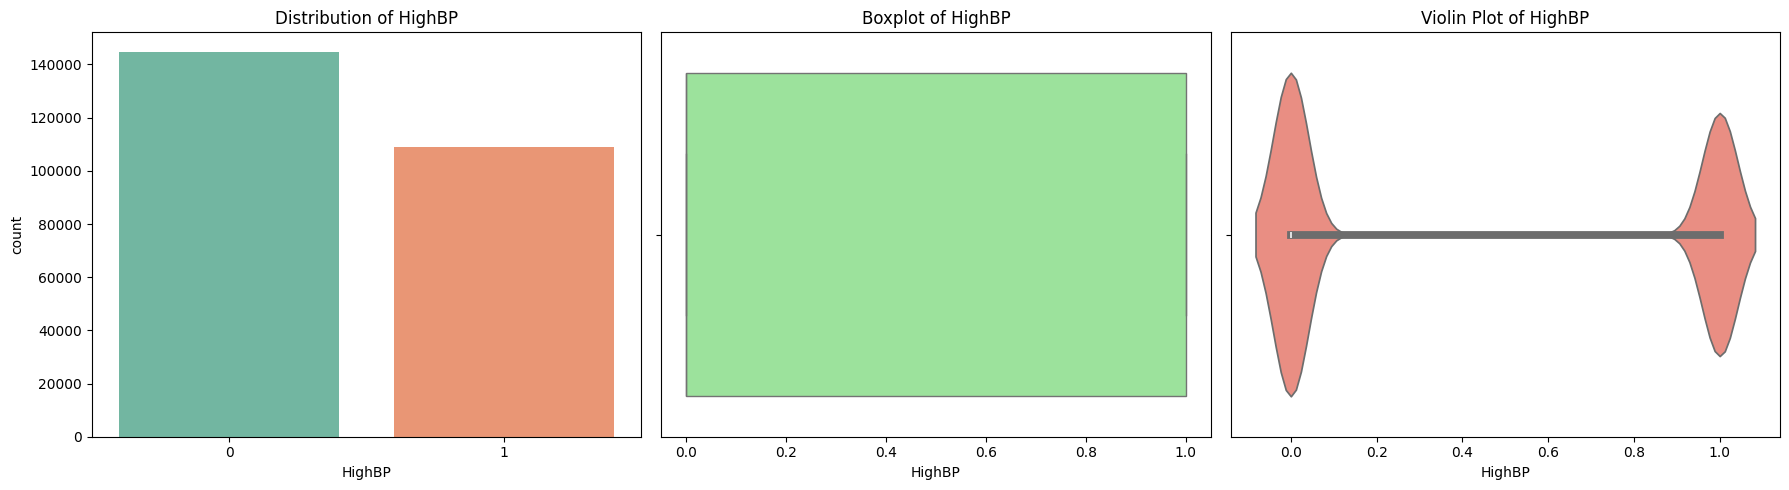

In [ ]:
plot_univariate(df, 'HighBP')

**Sebaran Data kolom HighBP**

- **Distribusi Biner:** Data **"HighBP"** hanya memiliki dua nilai (0 = tidak hipertensi, 1 = hipertensi).
- **Perbandingan Frekuensi:** Lebih banyak individu tidak mengalami tekanan darah tinggi.
- **Sebaran Data:** Tidak ada outlier yang signifikan, distribusi berbentuk bimodal.

Kesimpulan: Mayoritas individu dalam dataset tidak memiliki tekanan darah tinggi.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


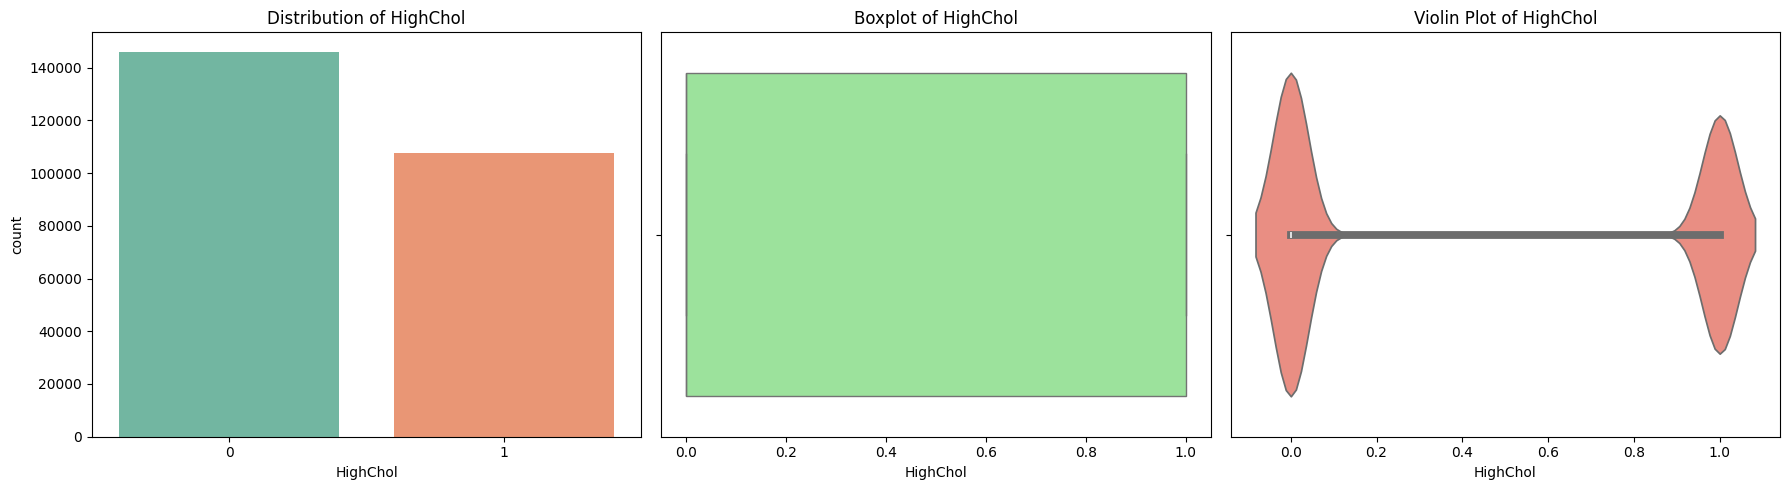

In [ ]:
plot_univariate(df, 'HighChol')

**Sebaran Data kolom HighChol**

- **Distribusi Biner:** Data `HighChol` terdiri dari dua kategori utama (0 = tidak memiliki kolesterol tinggi, 1 = memiliki kolesterol tinggi).
- **Perbandingan Frekuensi:** Lebih banyak individu memiliki kadar kolesterol normal dibandingkan tinggi, seperti yang ditampilkan dalam histogram.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi yang simetris.

Kesimpulan: Mayoritas individu dalam dataset tidak memiliki kadar kolesterol tinggi, seperti yang terlihat dari berbagai visualisasi statistik.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


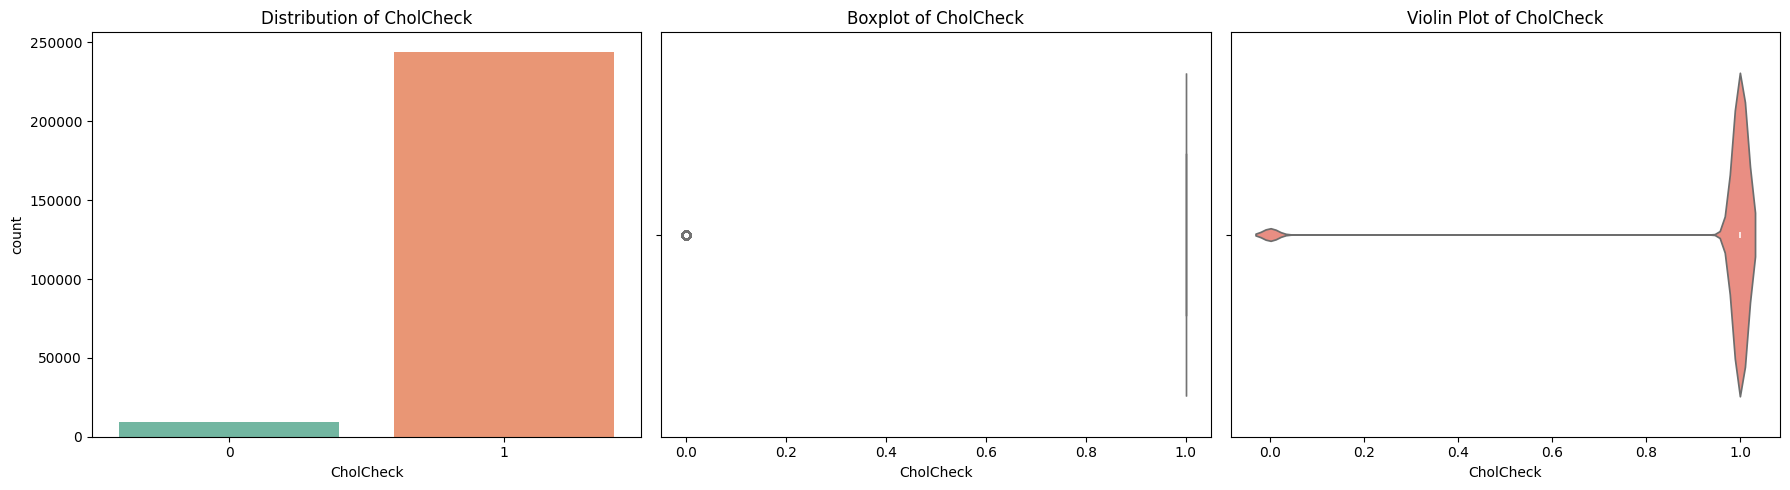

In [ ]:
plot_univariate(df, 'CholCheck')

**Sebaran Data kolom CholCheck**

- **Distribusi Biner:** Data `CholCheck` terdiri dari dua kategori utama (0 = tidak melakukan pemeriksaan kolesterol, 1 = melakukan pemeriksaan kolesterol).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa lebih banyak individu telah melakukan pemeriksaan kolesterol dibandingkan yang belum.
- **Sebaran Data:** Boxplot menunjukkan bahwa data ini tersebar dalam dua kelompok utama tanpa outlier signifikan, sementara violin plot mengonfirmasi distribusi berbentuk biner.

Kesimpulan: Mayoritas individu dalam dataset telah melakukan pemeriksaan kadar kolesterol mereka.


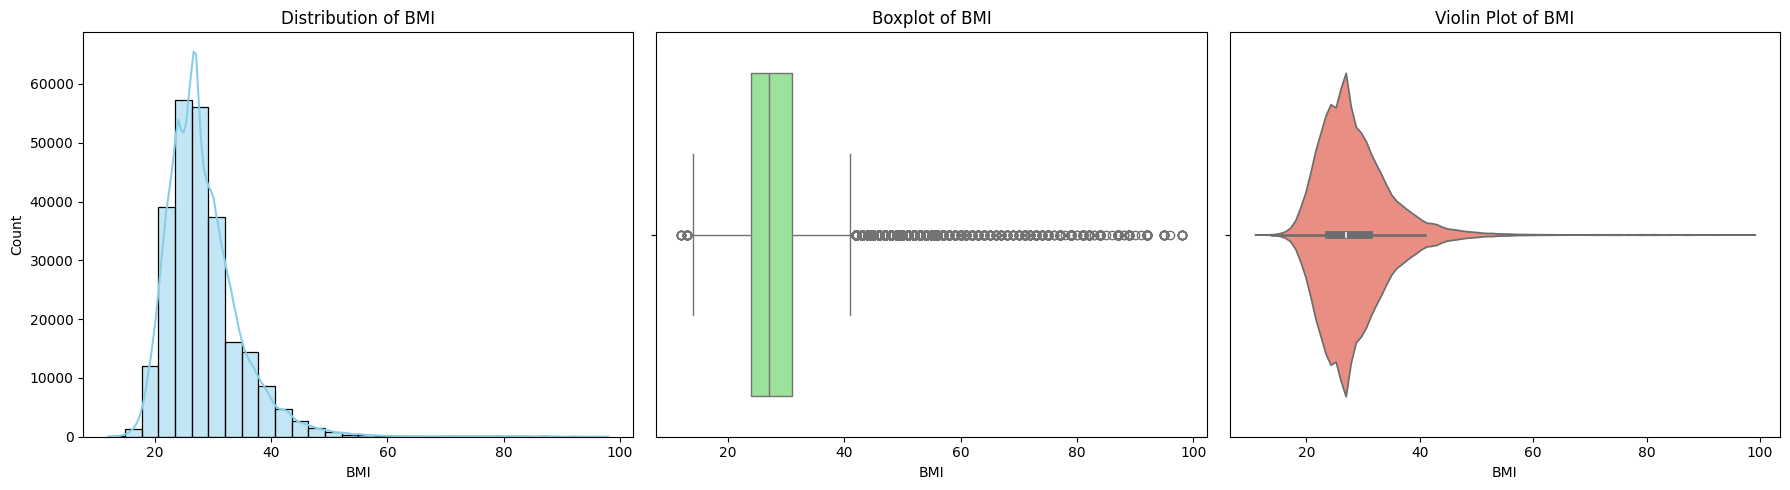

In [ ]:
plot_univariate(df, 'BMI')


**Sebaran Data kolom BMI**

- **Distribusi Kontinu:** Data `BMI` memiliki nilai yang beragam, bukan kategori biner.
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa mayoritas individu memiliki BMI dalam rentang normal hingga obesitas ringan.
- **Sebaran Data:** Boxplot mengindikasikan keberadaan beberapa outlier, terutama di nilai BMI yang sangat tinggi. Violin plot menunjukkan distribusi dengan puncak pada kategori overweight hingga obesitas.

Kesimpulan: Sebagian besar individu dalam dataset memiliki BMI di kategori overweight atau obesitas, dengan beberapa outlier yang menunjukkan kasus ekstrem.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


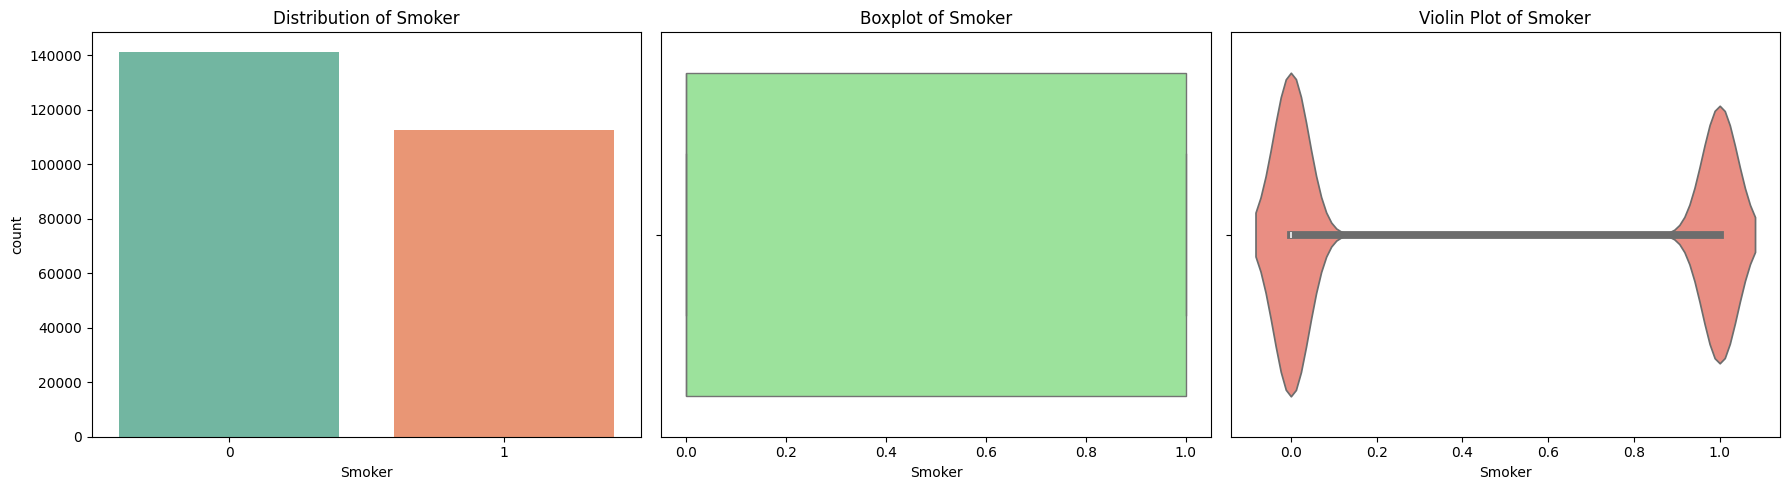

In [ ]:
 plot_univariate(df, 'Smoker')

**Sebaran Data kolom Smoker**

- **Distribusi Biner:** Data `Smoker` terdiri dari dua kategori utama (0 = tidak merokok, 1 = merokok).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah individu yang tidak merokok lebih banyak dibandingkan perokok.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi yang jelas dengan dua puncak.

Kesimpulan: Mayoritas individu dalam dataset bukan perokok, namun terdapat proporsi signifikan yang merupakan perokok aktif.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


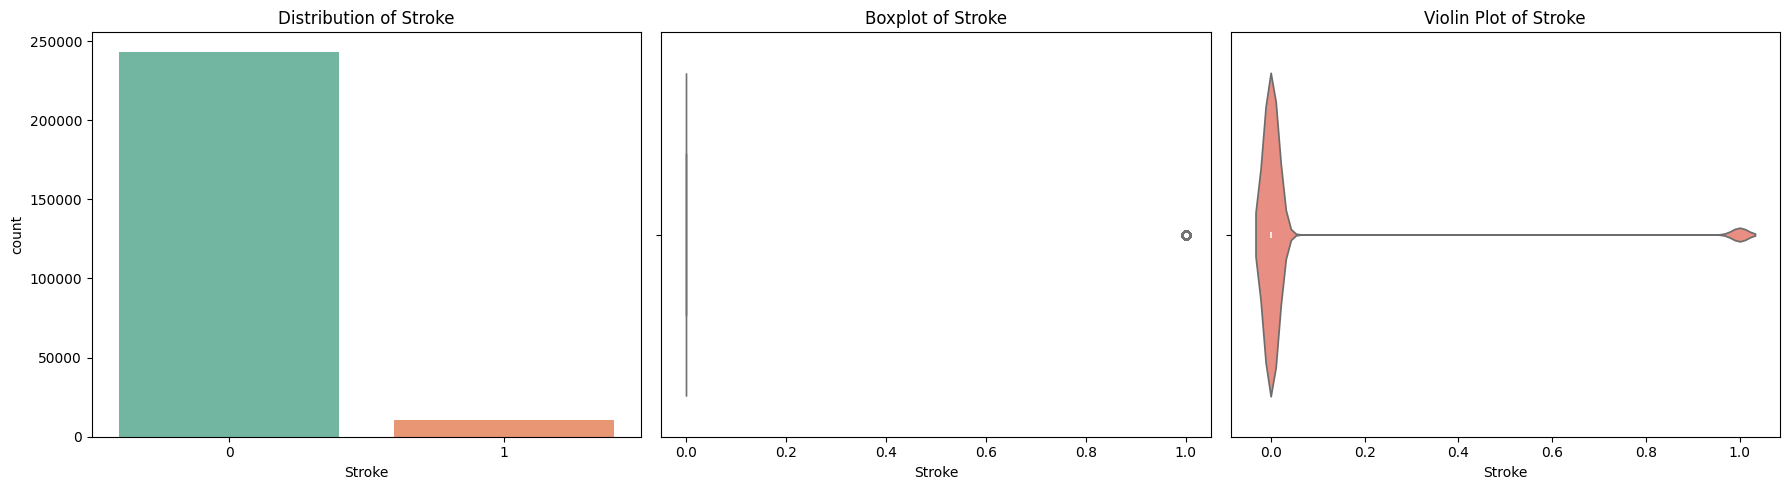

In [ ]:
plot_univariate(df, 'Stroke')

**Sebaran Data kolom Stroke**

- **Distribusi Biner:** Data `Stroke` terdiri dari dua kategori utama (0 = tidak mengalami stroke, 1 = mengalami stroke).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah individu yang tidak mengalami stroke jauh lebih banyak dibandingkan mereka yang mengalami stroke.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier yang signifikan, sementara violin plot mengonfirmasi distribusi dengan puncak yang jelas di dua kategori utama.

Kesimpulan: Mayoritas individu dalam dataset tidak mengalami stroke, namun terdapat proporsi kecil yang terdampak.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


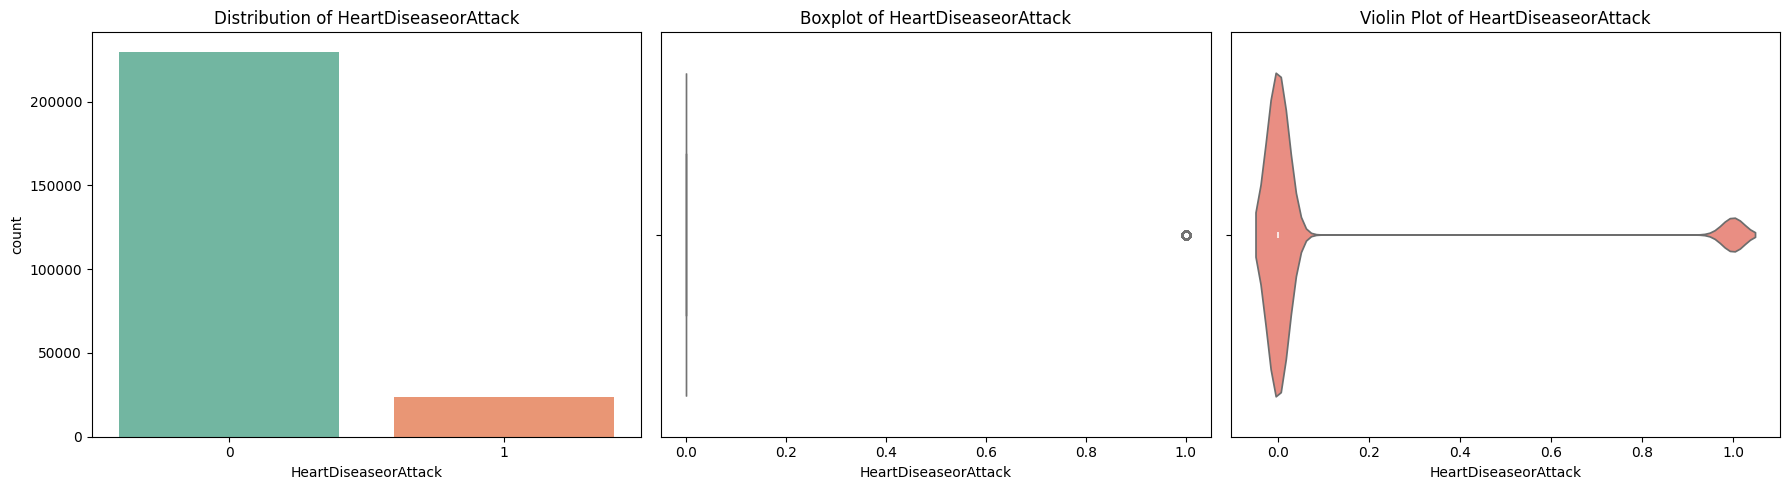

In [ ]:
plot_univariate(df, 'HeartDiseaseorAttack')

**Sebaran Data kolom HeartDiseaseorAttack**

- **Distribusi Biner:** Data `HeartDiseaseorAttack` terdiri dari dua kategori utama (0 = tidak mengalami penyakit jantung atau serangan jantung, 1 = mengalami penyakit jantung atau serangan jantung).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah individu yang tidak mengalami penyakit jantung jauh lebih banyak dibandingkan mereka yang terdampak.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier yang signifikan, sementara violin plot mengonfirmasi distribusi dengan puncak yang jelas di dua kategori utama.

Kesimpulan: Mayoritas individu dalam dataset tidak mengalami penyakit jantung atau serangan jantung, namun terdapat proporsi kecil yang terdampak.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


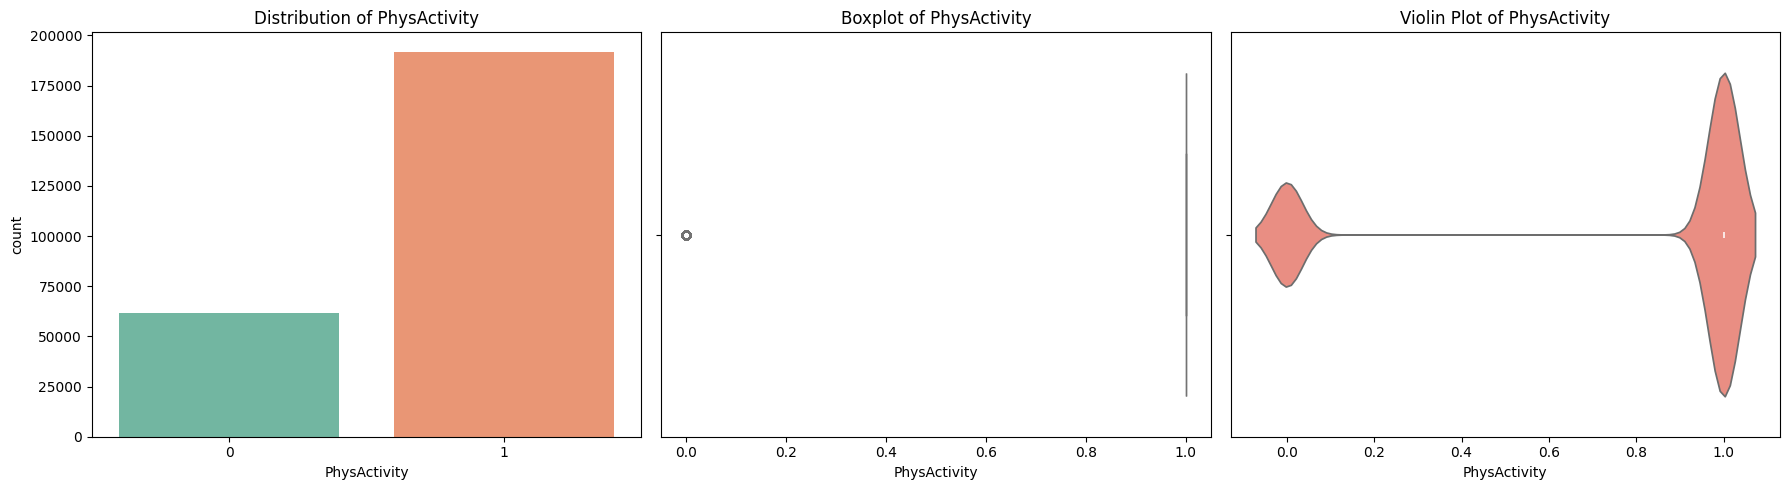

In [ ]:
plot_univariate(df, 'PhysActivity')

**Sebaran Data kolom PhysActivity**

- **Distribusi Biner:** Data `PhysActivity` terdiri dari dua kategori utama (0 = tidak melakukan aktivitas fisik, 1 = melakukan aktivitas fisik).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa lebih banyak individu yang melakukan aktivitas fisik dibandingkan yang tidak.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi yang jelas dengan dua puncak.

Kesimpulan: Mayoritas individu dalam dataset melakukan aktivitas fisik secara rutin.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


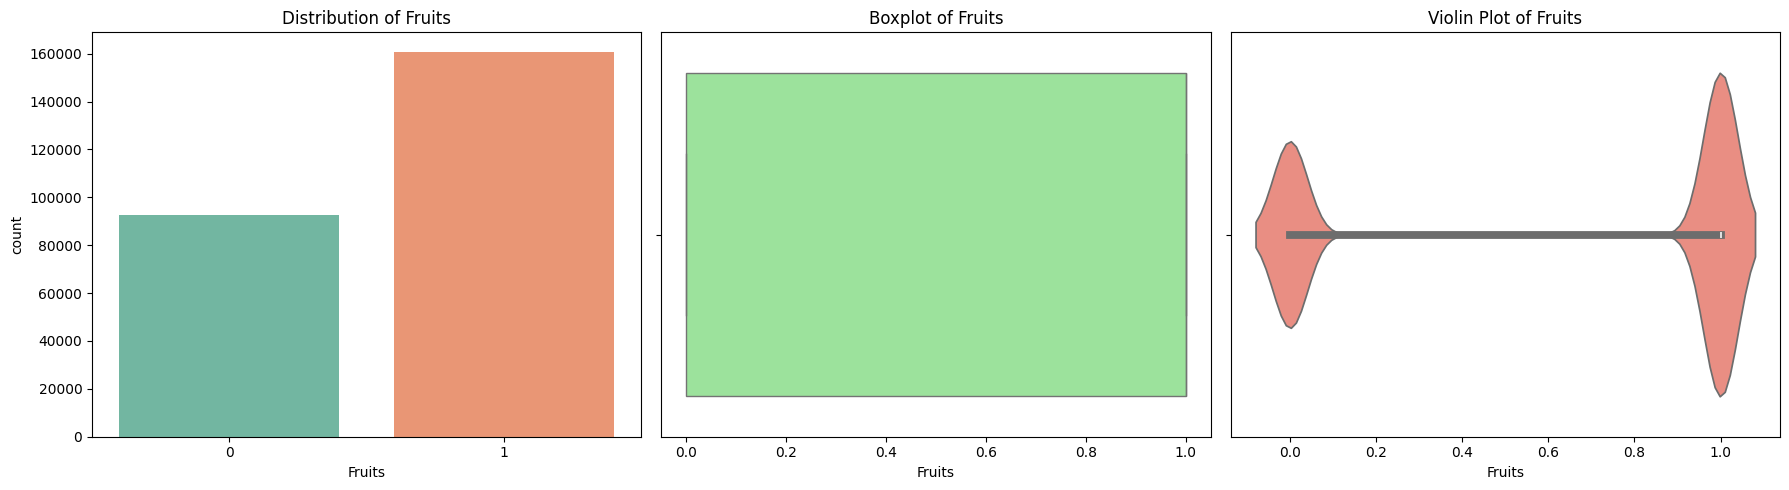

In [ ]:
plot_univariate(df, 'Fruits')

**Sebaran Data kolom Fruits**

- **Distribusi Biner:** Data `Fruits` terdiri dari dua kategori utama (0 = tidak mengonsumsi buah secara rutin, 1 = mengonsumsi buah secara rutin).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa lebih banyak individu yang rutin mengonsumsi buah dibandingkan yang tidak.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi distribusi berbentuk biner.

Kesimpulan: Mayoritas individu dalam dataset mengonsumsi buah secara rutin sebagai bagian dari pola makan mereka.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


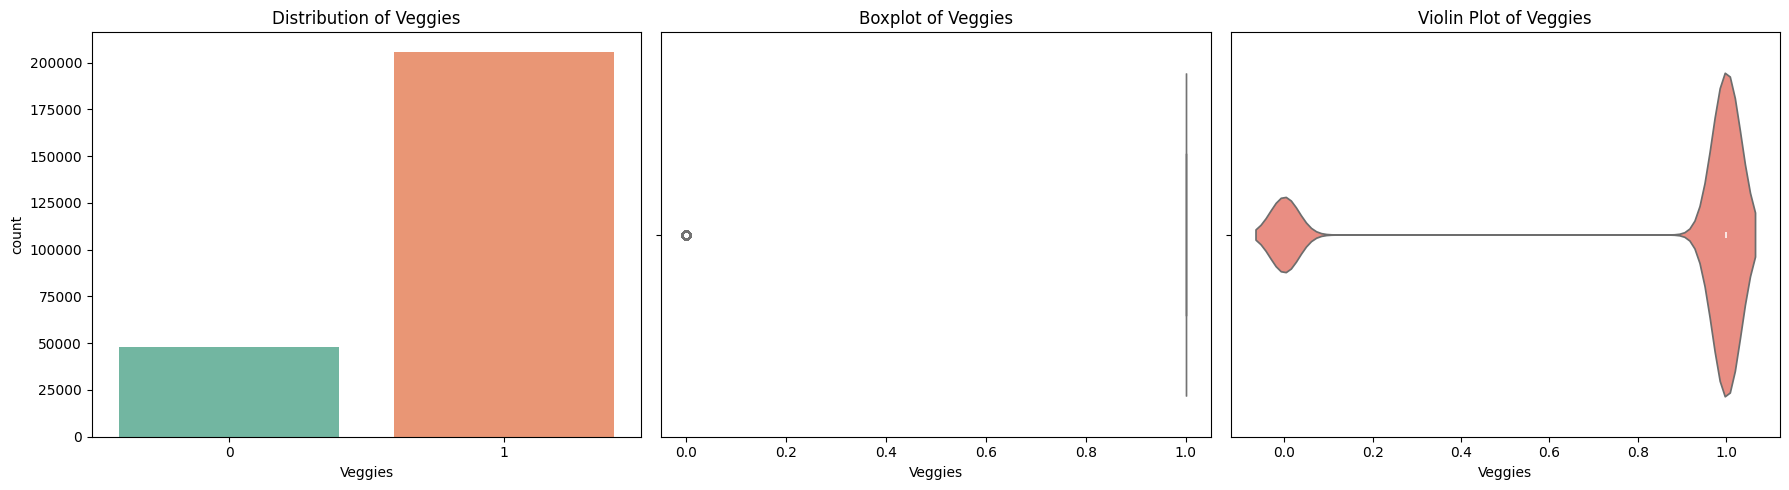

In [ ]:
plot_univariate(df, 'Veggies')

**Sebaran Data kolom Veggies**

- **Distribusi Biner:** Data `Veggies` terdiri dari dua kategori utama (0 = tidak mengonsumsi sayuran secara rutin, 1 = mengonsumsi sayuran secara rutin).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa lebih banyak individu yang rutin mengonsumsi sayuran dibandingkan yang tidak.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi distribusi berbentuk biner dengan dua puncak utama.

Kesimpulan: Mayoritas individu dalam dataset memiliki kebiasaan mengonsumsi sayuran secara rutin sebagai bagian dari pola makan mereka.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


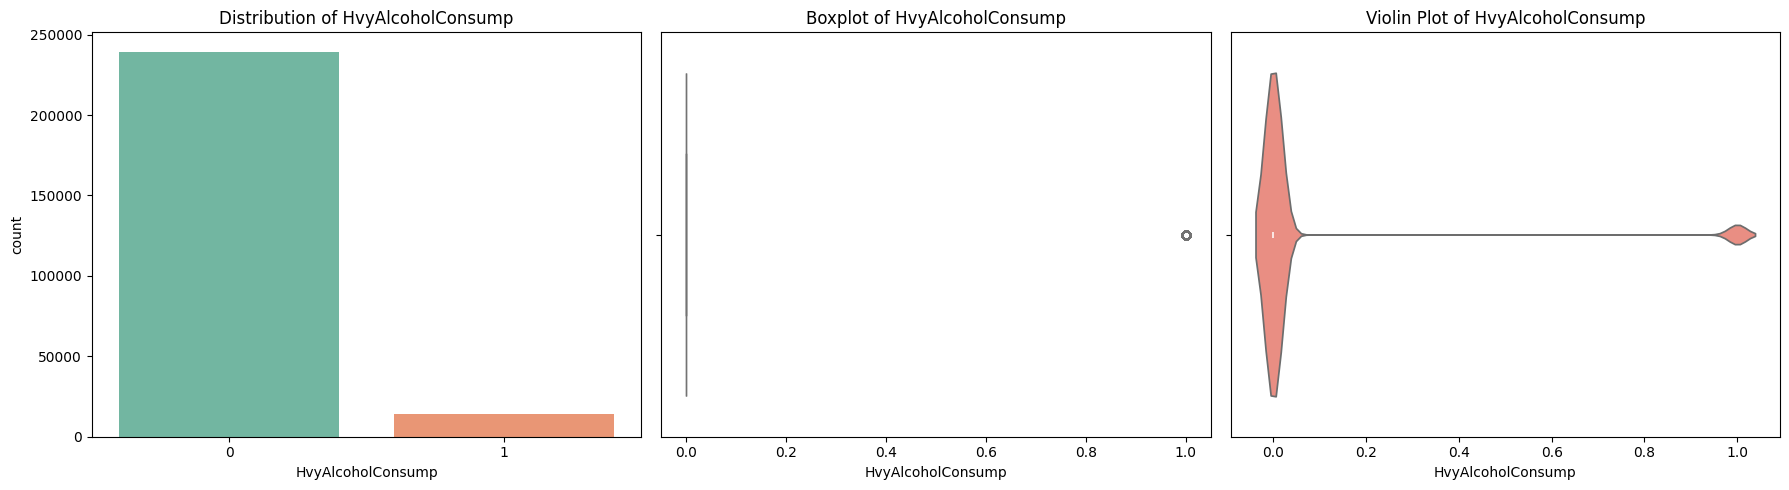

In [ ]:
plot_univariate(df, 'HvyAlcoholConsump')

**Sebaran Data kolom HvyAlcoholConsump**

- **Distribusi Biner:** Data `HvyAlcoholConsump` terdiri dari dua kategori utama (0 = tidak mengonsumsi alkohol dalam jumlah besar, 1 = mengonsumsi alkohol dalam jumlah besar).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah individu yang tidak mengonsumsi alkohol dalam jumlah besar lebih banyak dibandingkan mereka yang melakukannya.
- **Sebaran Data:** Boxplot menunjukkan persebaran data

<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


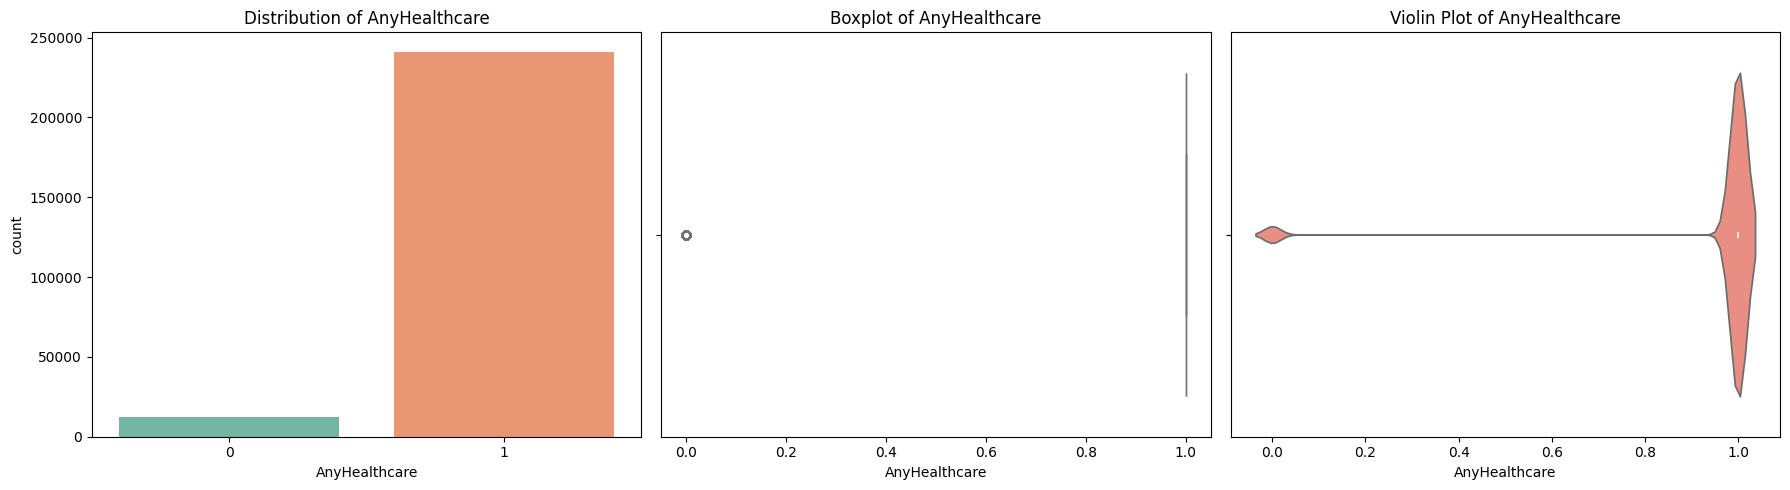

In [ ]:
plot_univariate(df, 'AnyHealthcare')

**Sebaran Data kolom AnyHealthcare**

- **Distribusi Biner:** Data `AnyHealthcare` terdiri dari dua kategori utama (0 = tidak memiliki akses layanan kesehatan, 1 = memiliki akses layanan kesehatan).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa mayoritas individu memiliki akses terhadap layanan kesehatan.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi yang jelas dengan dua puncak.

Kesimpulan: Mayoritas individu dalam dataset memiliki akses terhadap layanan kesehatan, meskipun ada sebagian kecil yang tidak.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


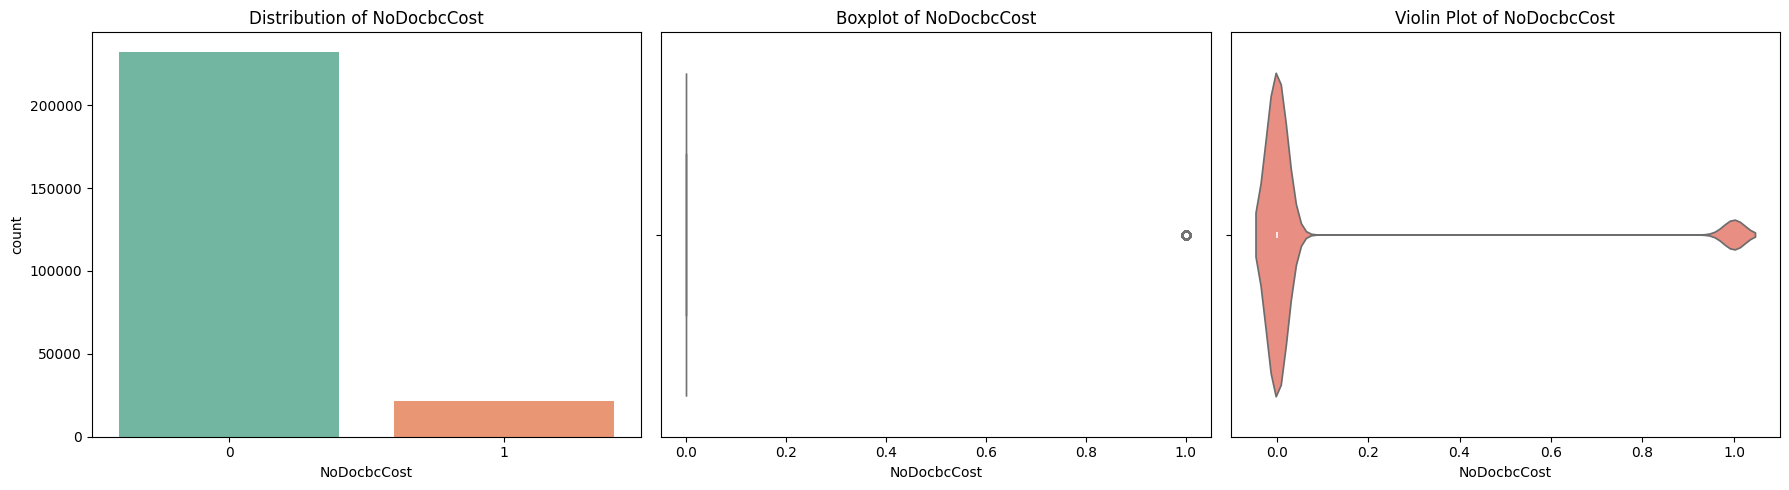

In [ ]:
plot_univariate(df, 'NoDocbcCost')

**Sebaran Data kolom AnyHealthcare NoDocbcCost**

- **Distribusi Biner:** Data `NoDocbcCost` terdiri dari dua kategori utama (0 = tidak mengalami kendala biaya untuk layanan kesehatan, 1 = mengalami kendala biaya untuk layanan kesehatan).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah individu yang tidak mengalami kendala biaya lebih banyak dibandingkan yang mengalami kesulitan.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi yang jelas dengan dua puncak.

Kesimpulan: Mayoritas individu dalam dataset tidak mengalami kendala biaya dalam mengakses layanan kesehatan, namun terdapat proporsi signifikan yang menghadapi hambatan finansial.


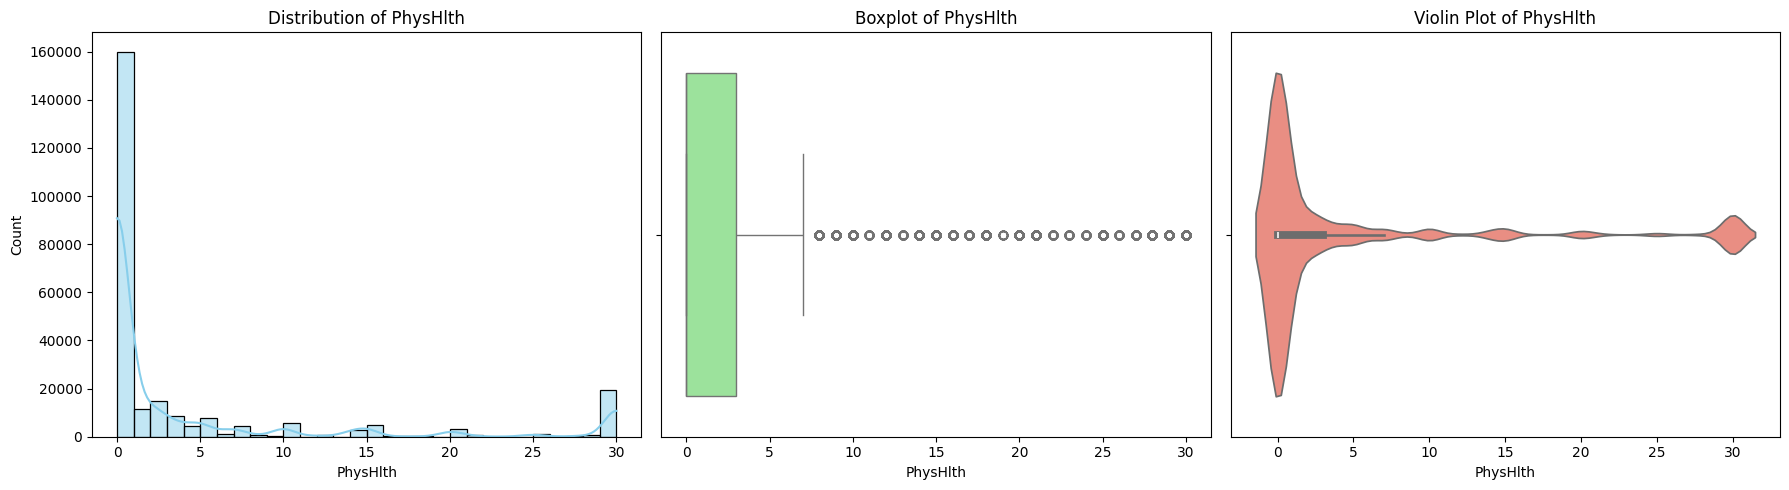

In [ ]:
plot_univariate(df, 'PhysHlth')

**Sebaran Data kolom PhysHlth**

- **Distribusi Kontinu:** Data `PhysHlth` memiliki rentang nilai yang lebih luas, menunjukkan jumlah hari kesehatan fisik buruk selama sebulan terakhir.
- **Perbandingan Frekuensi:** Histogram menunjukkan sebagian besar individu mengalami sedikit atau tidak ada hari kesehatan fisik buruk dalam sebulan.
- **Sebaran Data:** Boxplot menunjukkan keberadaan beberapa outlier dengan nilai yang lebih tinggi, sementara violin plot mengonfirmasi distribusi yang condong ke nilai rendah.

Kesimpulan: Mayoritas individu dalam dataset mengalami sedikit atau tidak ada masalah kesehatan fisik selama sebulan terakhir, meskipun terdapat beberapa individu dengan kondisi kesehatan yang lebih buruk.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


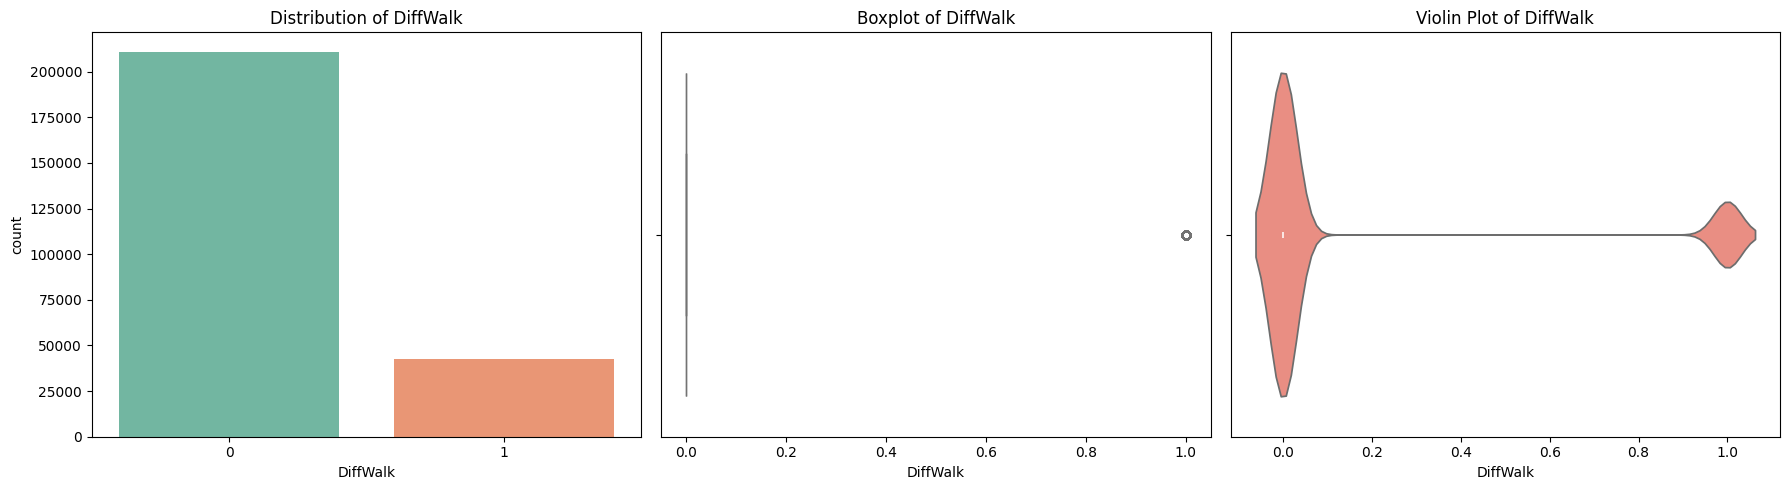

In [ ]:
plot_univariate(df, 'DiffWalk')

**Sebaran Data kolom DiffWalk**

- **Distribusi Biner:** Data `DiffWalk` terdiri dari dua kategori utama (0 = tidak mengalami kesulitan berjalan, 1 = mengalami kesulitan berjalan).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah individu yang tidak mengalami kesulitan berjalan jauh lebih banyak dibandingkan mereka yang mengalami kesulitan.
- **Sebaran Data:** Boxplot menunjukkan persebaran data tanpa outlier yang signifikan, sementara violin plot mengonfirmasi pola distribusi dengan dua puncak yang jelas.

Kesimpulan: Mayoritas individu dalam dataset tidak mengalami kesulitan berjalan, meskipun ada sebagian kecil yang terdampak.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


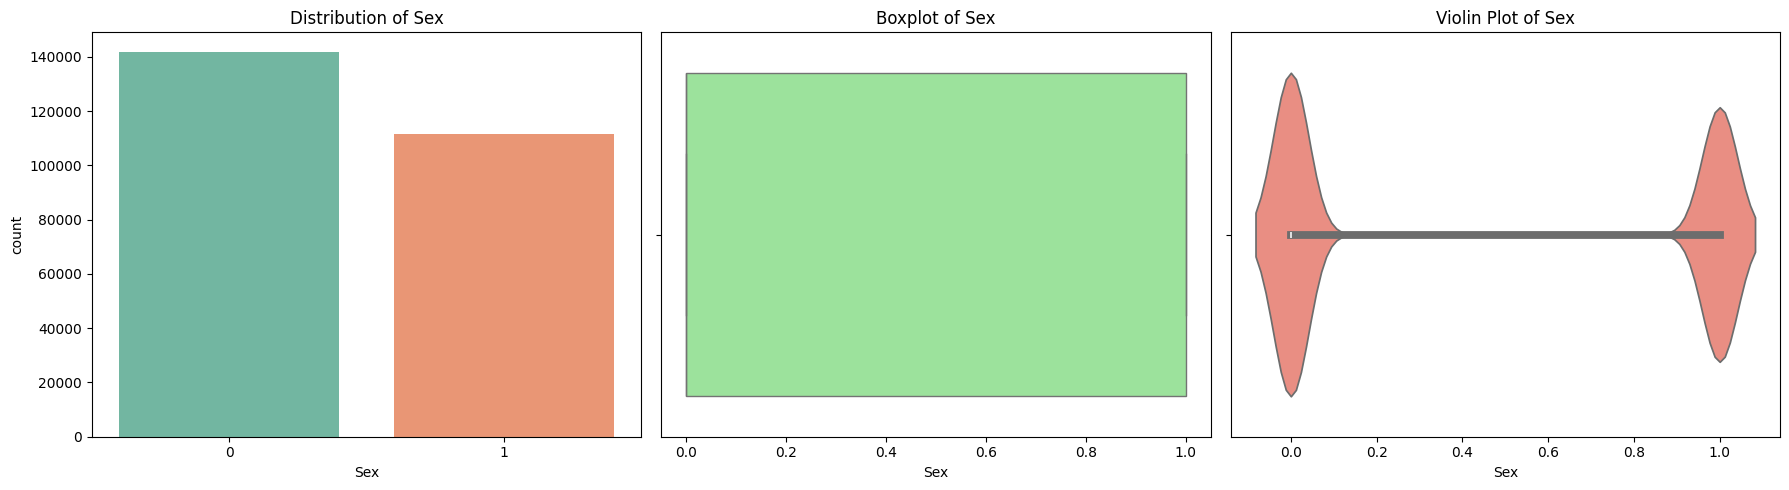

In [ ]:
plot_univariate(df, 'Sex')

**Sebaran Data kolom Sex**

- **Distribusi Biner:** Data `Sex` terdiri dari dua kategori utama (0 = perempuan, 1 = laki-laki).
- **Perbandingan Frekuensi:** Histogram menunjukkan bahwa jumlah perempuan lebih banyak dibandingkan laki-laki dalam dataset.
- **Sebaran Data:** Boxplot menunjukkan distribusi yang seimbang tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi yang jelas dengan dua puncak utama.

Kesimpulan: Mayoritas individu dalam dataset adalah perempuan, namun distribusinya tetap cukup seimbang antara kedua kategori.


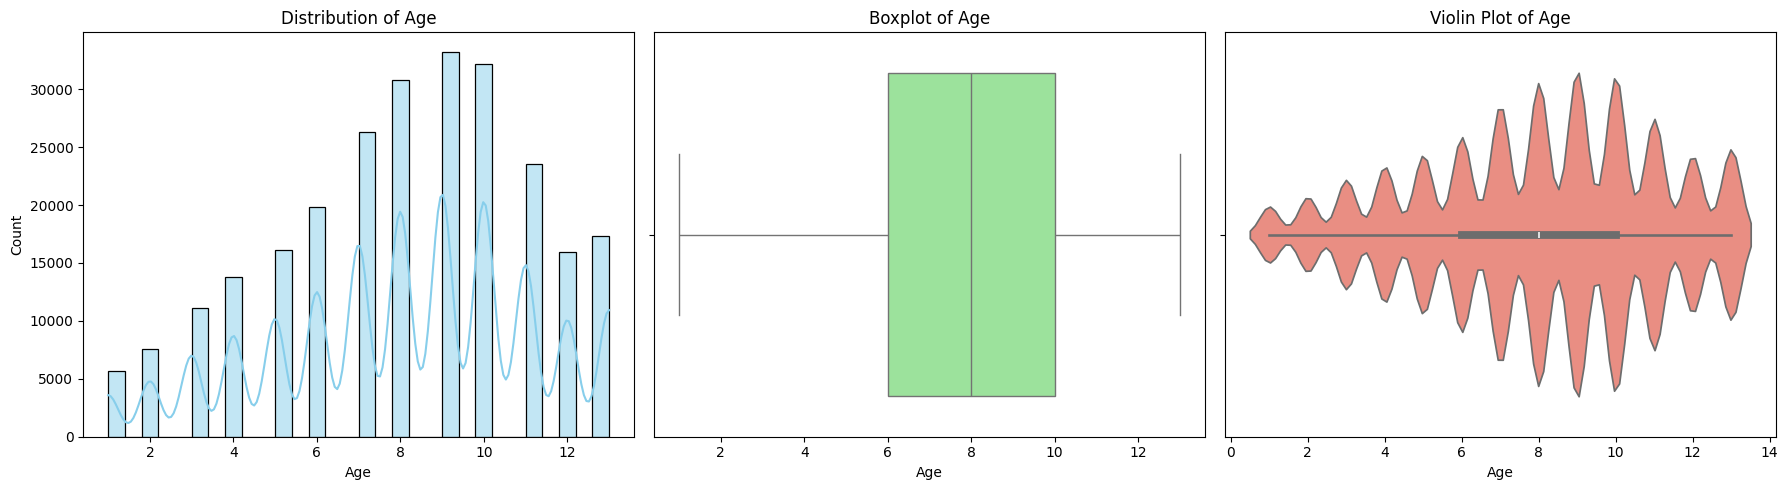

In [ ]:
plot_univariate(df, 'Age')

**Sebaran Data kolom Age**

- **Distribusi Kategorikal:** Data `Age` dikategorikan dalam beberapa kelompok usia dengan nilai numerik.
- **Perbandingan Frekuensi:** Histogram menunjukkan distribusi yang cenderung lebih banyak pada kelompok usia menengah hingga lanjut.
- **Sebaran Data:** Boxplot menunjukkan persebaran usia dengan rentang yang cukup luas tanpa outlier signifikan, sementara violin plot mengonfirmasi distribusi yang berpola.

Kesimpulan: Mayoritas individu dalam dataset berasal dari kelompok usia menengah hingga lanjut, dengan distribusi yang merata di berbagai kategori usia.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


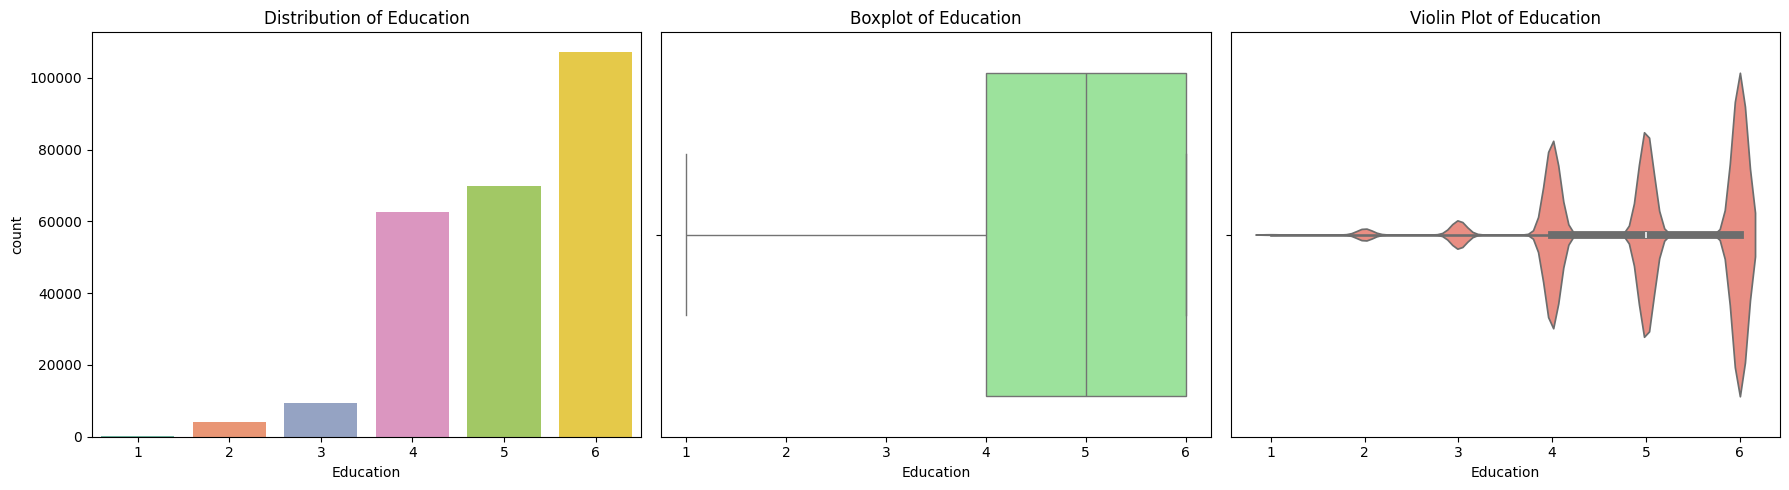

In [ ]:
plot_univariate(df, 'Education')

**Sebaran Data kolom Education**

- **Distribusi Kategorikal:** Data `Education` terdiri dari beberapa kategori yang mencerminkan tingkat pendidikan individu.
- **Perbandingan Frekuensi:** Histogram menunjukkan distribusi tingkat pendidikan, dengan beberapa kategori lebih dominan dibandingkan lainnya.
- **Sebaran Data:** Boxplot mengindikasikan persebaran data tanpa outlier signifikan, sementara violin plot menunjukkan distribusi dengan pola tertentu.

Kesimpulan: Mayoritas individu dalam dataset memiliki tingkat pendidikan yang bervariasi, dengan distribusi yang mencerminkan karakteristik populasi.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


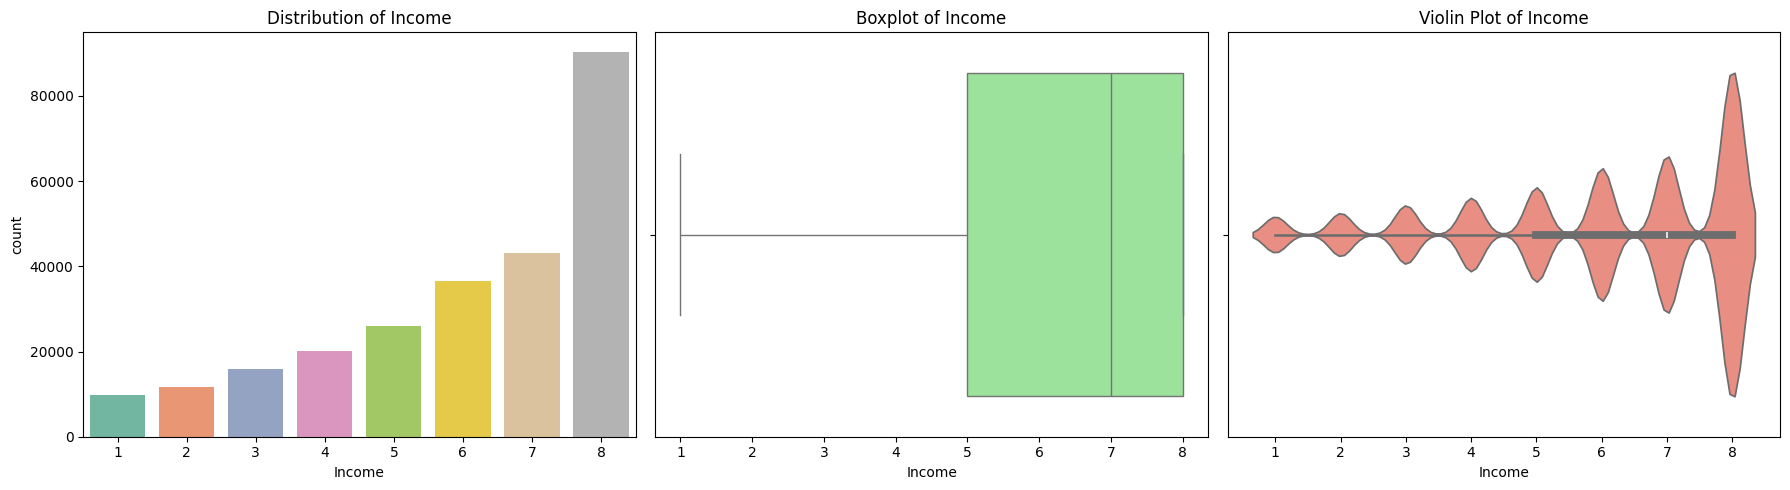

In [ ]:
plot_univariate(df, 'Income')

**Sebaran Data kolom Income**

- **Distribusi Kategorikal:** Data `Income` dikategorikan dalam beberapa kelompok yang mencerminkan tingkat pendapatan individu.
- **Perbandingan Frekuensi:** Histogram menunjukkan distribusi tingkat pendapatan, dengan beberapa kategori lebih dominan dibandingkan lainnya.
- **Sebaran Data:** Boxplot menunjukkan persebaran pendapatan tanpa outlier signifikan, sementara violin plot mengonfirmasi pola distribusi dengan variasi yang jelas.

Kesimpulan: Mayoritas individu dalam dataset berasal dari kelompok pendapatan tertentu, dengan distribusi yang mencerminkan karakteristik ekonomi populasi.


<ipython-input-9-e6473f5893ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")


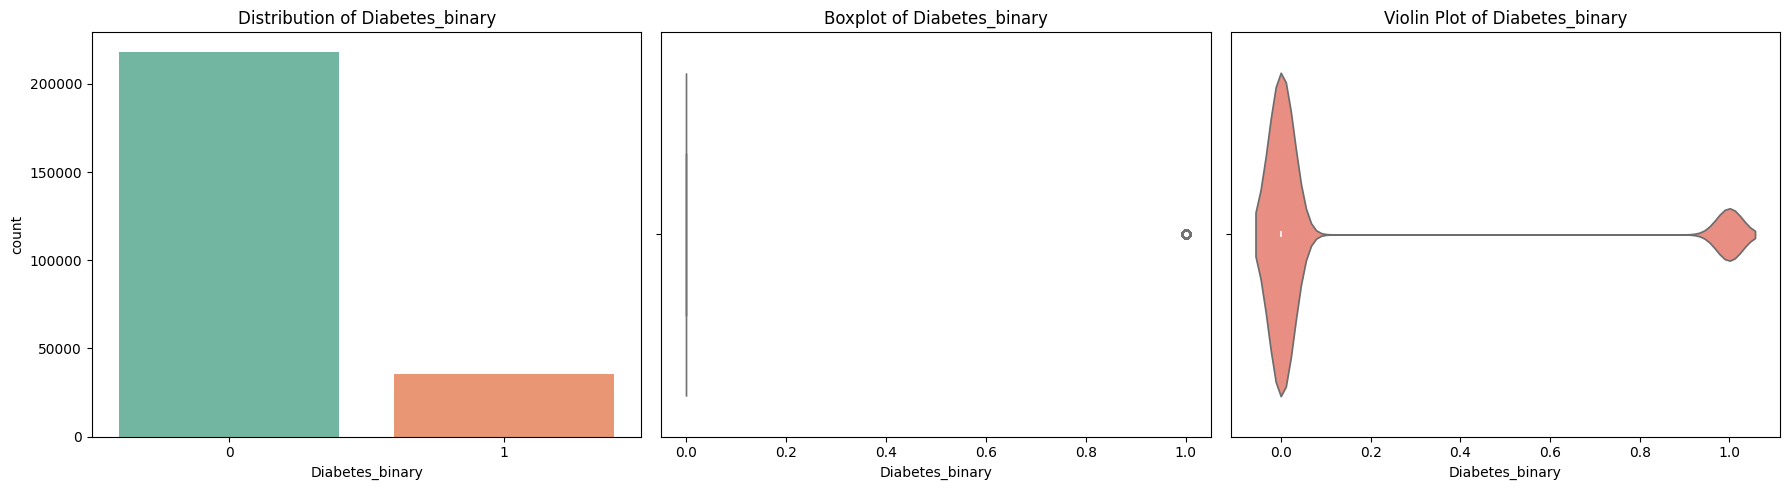

In [ ]:
plot_univariate(df, 'Diabetes_binary')

**Sebaran Data kolom Income Diabetes_binary**

- **Distribusi Kategorikal:** Data `Income` terdiri dari beberapa kategori yang mencerminkan tingkat pendapatan individu.
- **Perbandingan Frekuensi:** Histogram menunjukkan distribusi tingkat pendapatan pada individu dengan atau tanpa diabetes, dengan beberapa kategori pendapatan lebih dominan dalam masing-masing kelompok.
- **Sebaran Data:** Boxplot menunjukkan persebaran pendapatan dalam kedua kategori diabetes tanpa outlier signifikan, sementara violin plot mengonfirmasi distribusi dengan pola tertentu.

Kesimpulan: Mayoritas individu dalam dataset memiliki tingkat pendapatan yang bervariasi, dengan distribusi yang mencerminkan karakteristik ekonomi populasi terkait status diabetes.


In [ ]:
# Melihat statistik deskriptif kolom BMI
bmi_stats = df['BMI'].describe()
print(bmi_stats)
# Menghitung IQR dan batas outlier
Q1 = bmi_stats['25%']
Q3 = bmi_stats['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64
IQR: 7.0
Lower bound: 13.5
Upper bound: 41.5


## Multivariate Analysis

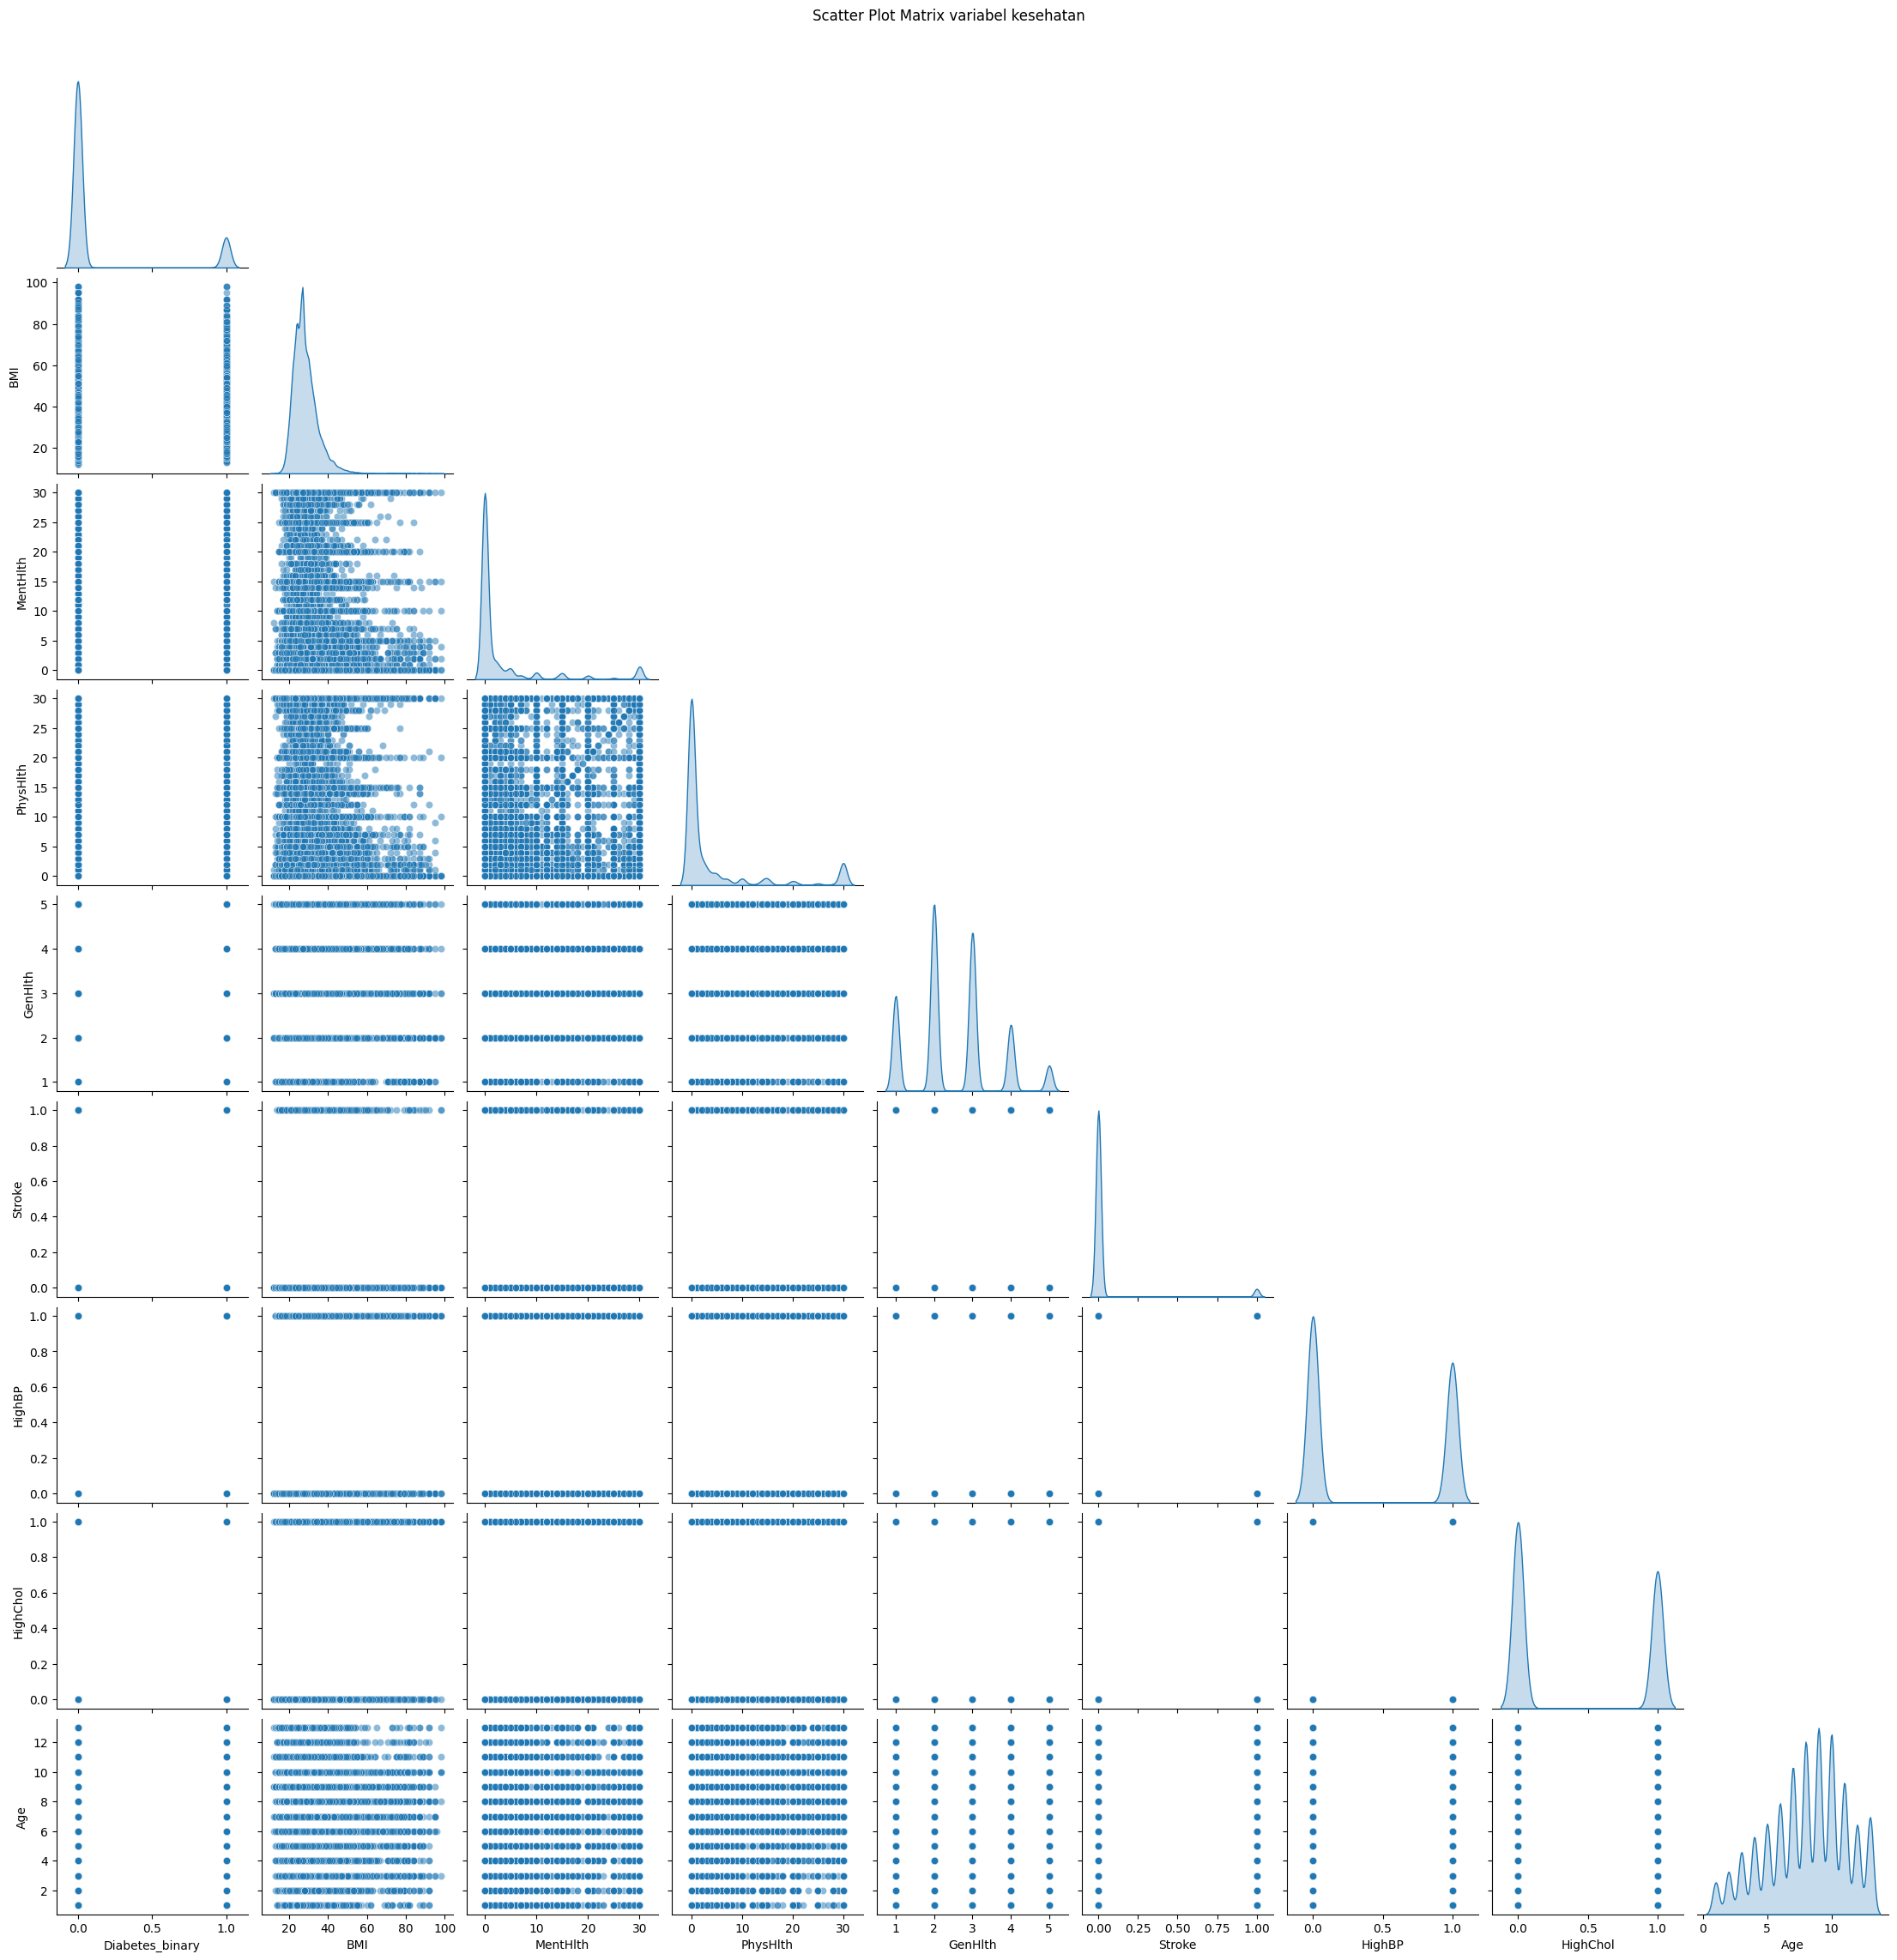

In [ ]:
# Pilih subset kolom numerik yang relevan untuk kesehatan
numerical_cols = ['Diabetes_binary','BMI', 'MentHlth', 'PhysHlth', 'GenHlth','Stroke','HighBP','HighChol', 'Age']

# Scatter plot matrix
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Scatter Plot Matrix variabel kesehatan", y=1.02)
plt.show()

**Analisis Scatter Plot Matrix Variabel Kesehatan**

Berdasarkan visualisasi **scatter plot matrix** antar variabel kesehatan (seperti BMI, HeartRate, PhysHlth, MentHlth, Age, Diabetes_binary, dll.), berikut adalah interpretasi yang diperoleh:

---

**1. Distribusi dan Skewness**
- **BMI**: Distribusinya tidak normal dan cenderung _right-skewed_. Mayoritas individu berada dalam rentang BMI 20–30, dengan beberapa nilai ekstrem.
- **PhysHlth** & **MentHlth**: Distribusi _left-skewed_, artinya sebagian besar responden melaporkan sedikit hari tidak sehat secara fisik dan mental.
- **Age**: Distribusi bertingkat (_multimodal_), menunjukkan pengelompokan dalam kategori usia tertentu.

---

**2. Korelasi Antar Variabel (Visual)**
- **BMI vs. HeartRate**: Tidak menunjukkan korelasi linier yang jelas (pola tersebar acak).
- **BMI vs. PhysHlth / MentHlth**: Tidak linier, tapi individu dengan BMI tinggi cenderung memiliki nilai PhysHlth/MentHlth yang tinggi pula.
- **HeartRate** dengan variabel lain: Tidak tampak hubungan yang signifikan.
- **Age vs. Diabetes_binary**: Terlihat kecenderungan meningkatnya kasus diabetes pada usia yang lebih tua.

---

**3. Variabel Kategori (Diskrit & Biner)**
- **GenHlth** (kesehatan umum): Variabel ordinal (1–5) yang menyebar terhadap variabel lain — berpotensi sebagai indikator persepsi kesehatan secara umum.
- **HighBP**, **HighChol**, **Stroke**, **HeartDiseaseorAttack**:
  - Tampil sebagai barisan titik sejajar (variabel biner).
  - Kasus penyakit lebih banyak muncul pada kelompok dengan **BMI tinggi** dan **usia tua**.

---

**4. Usia dan Penyakit**
- **Age** menunjukkan hubungan visual paling jelas terhadap kondisi kesehatan kronis:
  - Usia tua lebih banyak terkait dengan:
    - `Diabetes_binary = 1`
    - `HighBP = 1`
    - `HighChol = 1`
    - `Stroke = 1`
    - `HeartDiseaseorAttack = 1`

---

**Kesimpulan Umum**

| Kategori            | Temuan Utama |
|---------------------|--------------|
| **Distribusi**        | Banyak variabel bersifat skewed (terutama BMI dan variabel kesehatan mental/fisik) |
| **Outlier**           | Outlier terlihat jelas pada BMI dan variabel kesehatan |
| **Korelasi kuat**     | Tidak ada hubungan linier kuat, namun hubungan non-linear potensial perlu digali lebih lanjut |
| **Faktor Risiko**     | Usia dan BMI paling terkait dengan risiko penyakit kronis |

---

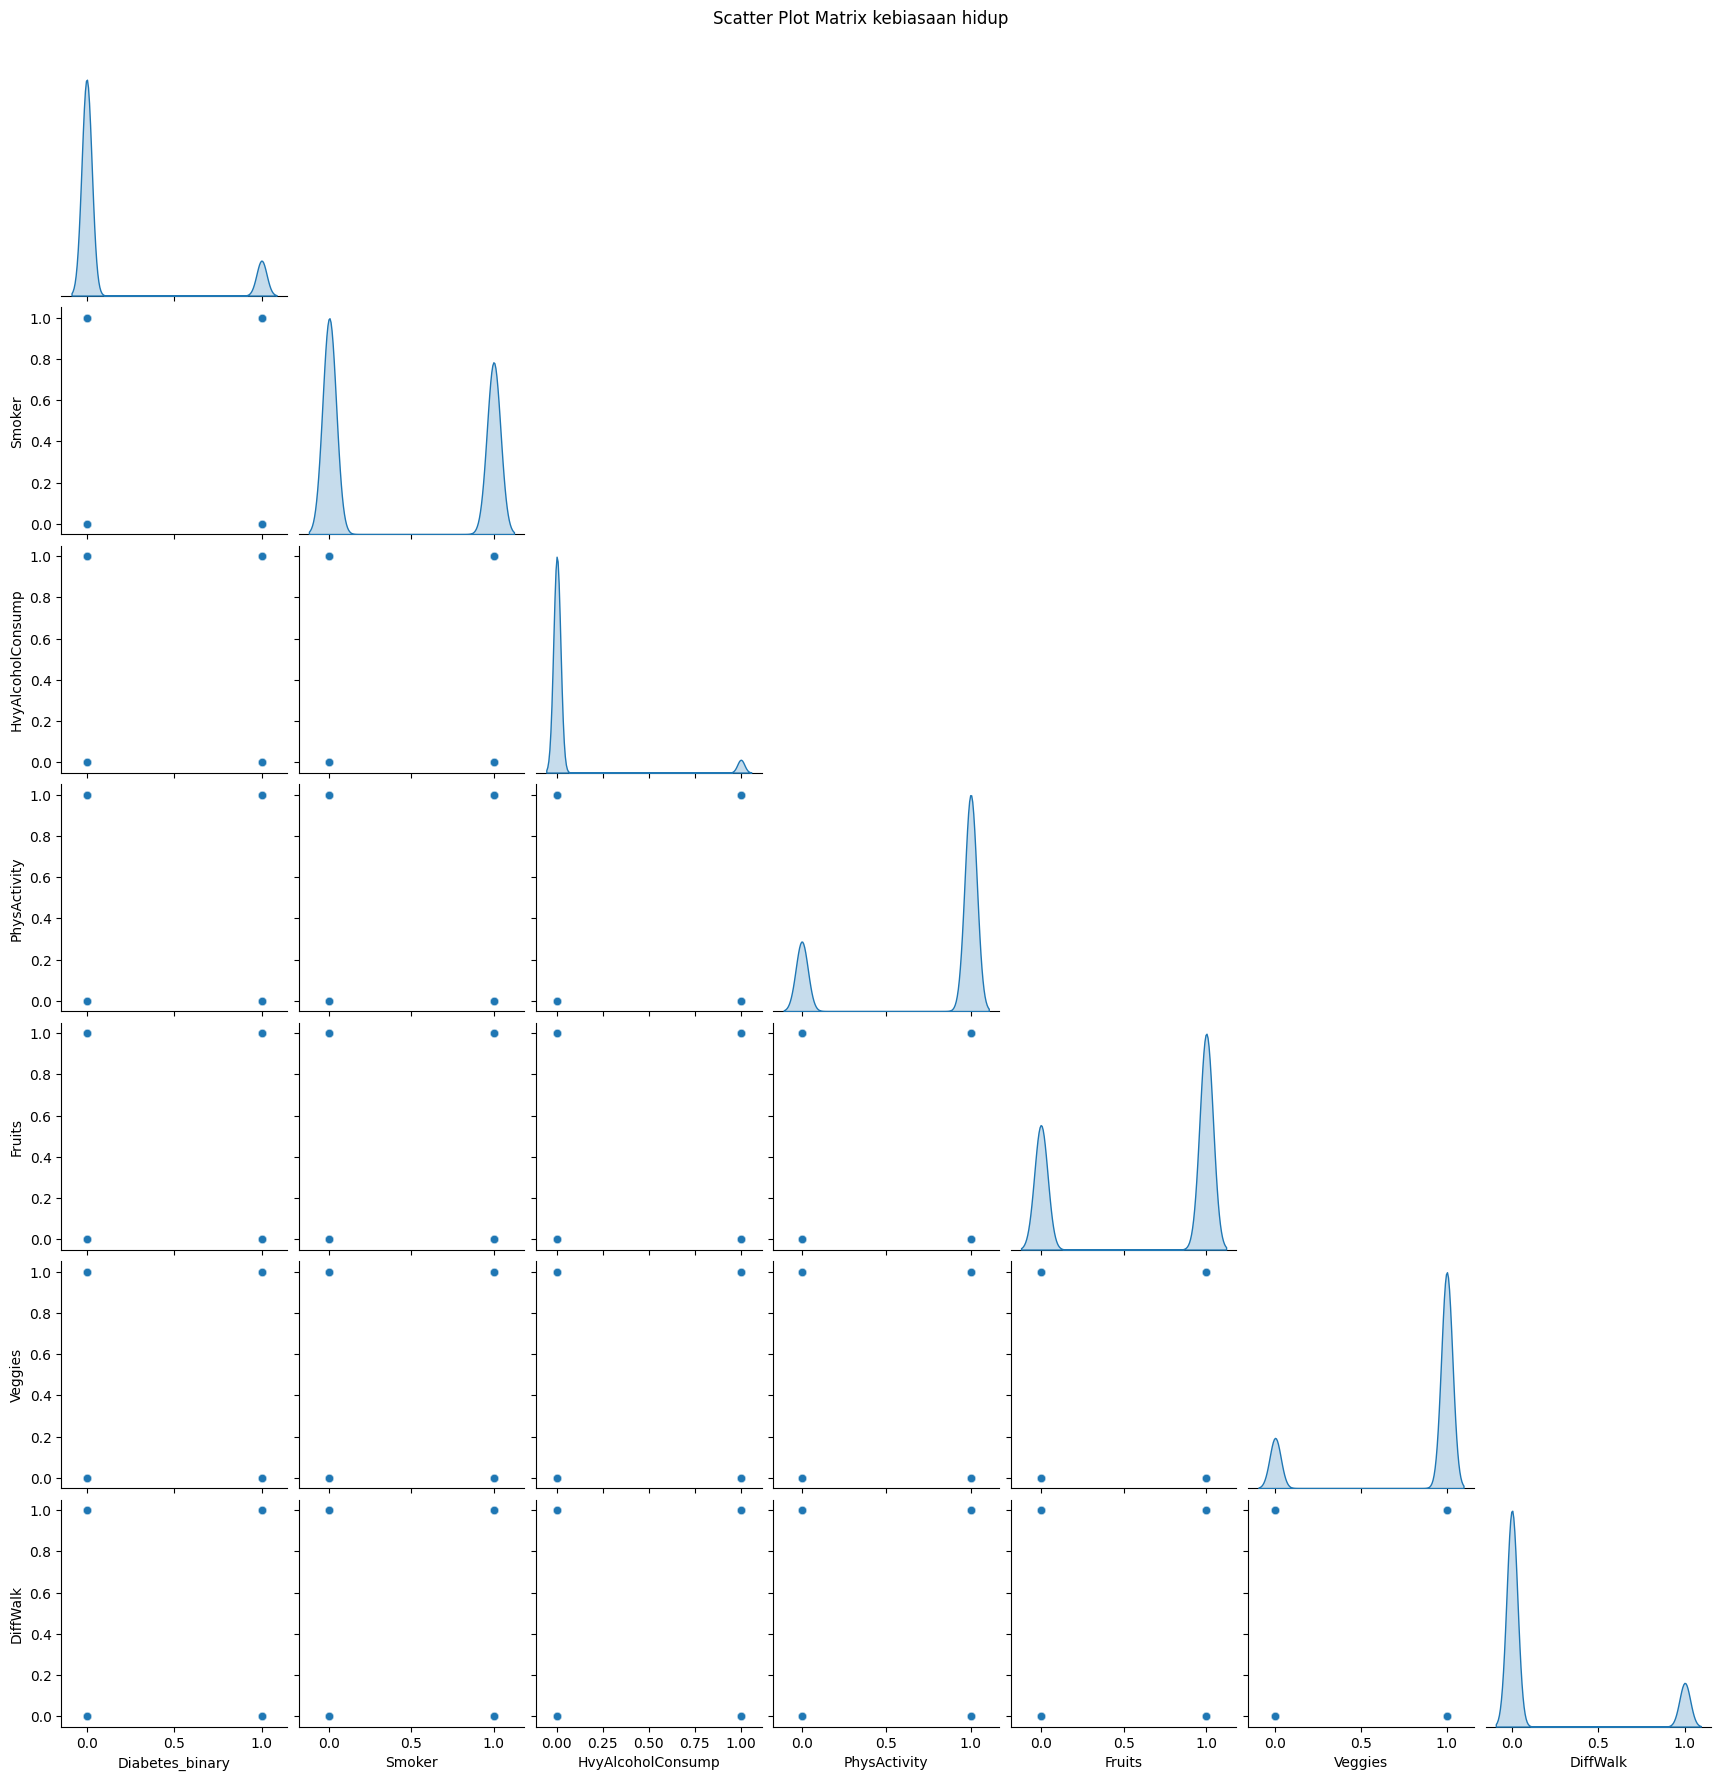

In [ ]:
# Pilih subset kolom numerik yang relevan untuk kebiasaan hidup
numerical_cols2 = ['Diabetes_binary','Smoker', 'HvyAlcoholConsump','PhysActivity', 'Fruits', 'Veggies', 'DiffWalk']

# Scatter plot matrix
sns.pairplot(df[numerical_cols2], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Scatter Plot Matrix kebiasaan hidup", y=1.02)
plt.show()

**Analisis Scatter Plot Matrix Variabel Kebiasaan Hidup**

Scatter plot matrix ini memvisualisasikan hubungan antar variabel gaya hidup dan diabetes. Variabel-variabel yang dianalisis meliputi:

- `Smoker`
- `PhysActivity`
- `Fruits`
- `Veggies`
- `DiffWalk`
- `HighAlcoholConsump`
- `Diabetes_binary`

---

**1. Distribusi Variabel**
- Mayoritas variabel adalah **biner (0/1)** sehingga distribusinya berupa dua puncak (berupa spike).
- Contoh:
  - **Smoker**: Banyak individu yang tidak merokok (`0`) dibanding yang merokok (`1`).
  - **PhysActivity**, **Fruits**, **Veggies**, dan **DiffWalk** menunjukkan distribusi serupa, dengan banyak individu yang memilih gaya hidup sehat.

---

**2. Hubungan Antar Variabel**
- **Smoker vs. Diabetes_binary**: Tidak terlihat pola korelasi yang kuat secara visual, namun proporsi penderita diabetes cenderung lebih tinggi pada perokok.
- **HighAlcoholConsump vs. Diabetes_binary**: Tampak penyebaran yang luas — kemungkinan tidak terlalu berkorelasi langsung.
- **PhysActivity vs. Diabetes_binary**:
  - Orang yang melakukan aktivitas fisik cenderung memiliki prevalensi diabetes lebih rendah.
- **Fruits & Veggies vs. Diabetes_binary**:
  - Konsumsi buah dan sayur berkorelasi lemah secara visual, namun individu yang mengonsumsinya cenderung lebih sedikit menderita diabetes.
- **DiffWalk** (kesulitan berjalan) memiliki hubungan yang tampak jelas:
  - Individu dengan kesulitan berjalan cenderung lebih banyak yang menderita diabetes.

---

**3. Interaksi Gaya Hidup Sehat**
- Terdapat korelasi positif antar kebiasaan sehat:
  - **Fruits** vs. **Veggies** → Individu yang mengonsumsi buah cenderung juga mengonsumsi sayur.
  - **PhysActivity** vs. **Fruits/Veggies** → Aktivitas fisik sering dilakukan bersamaan dengan pola makan sehat.

---

**Kesimpulan Umum**

| Kategori            | Temuan Utama |
|---------------------|--------------|
| **Distribusi**        | Variabel mostly biner, distribusi spike di 0 dan 1 |
| **Faktor Risiko**     | `DiffWalk`, `Smoker`, dan `HighAlcoholConsump` tampak lebih dominan pada penderita diabetes |
| **Faktor Protektif**  | `PhysActivity`, konsumsi `Fruits` dan `Veggies` cenderung dominan pada non-diabetik |
| **Korelasi antar variabel** | Perilaku hidup sehat cenderung berkelompok (misalnya: konsumsi sayur, buah, dan olahraga) |

---


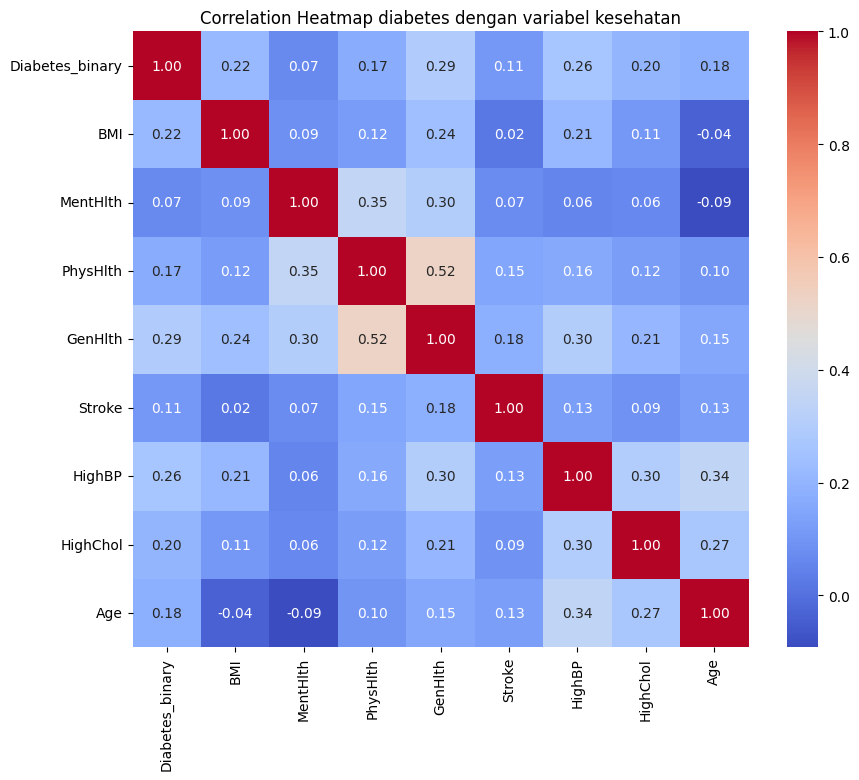

In [ ]:
# Korelasi antar kolom numerik
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap diabetes dengan variabel kesehatan')
plt.show()

**Korelasi Signifikan terhadap Diabetes:**

| Variabel     | Korelasi | Interpretasi                                                                 |
|--------------|----------|------------------------------------------------------------------------------|
| **GenHlth**  | 0.29     | Korelasi sedang: semakin buruk persepsi kesehatan umum, semakin tinggi risiko diabetes. |
| **HighBP**   | 0.26     | Korelasi sedang: tekanan darah tinggi cenderung dialami oleh penderita diabetes. |
| **BMI**      | 0.22     | Korelasi lemah hingga sedang: indeks massa tubuh yang tinggi sedikit berkorelasi dengan diabetes. |
| **HighChol** | 0.20     | Korelasi lemah: kadar kolesterol tinggi sedikit berkaitan dengan diabetes. |
| **PhysHlth** | 0.17     | Korelasi lemah: kesehatan fisik yang buruk cenderung ditemukan pada penderita diabetes. |
| **Age**      | 0.18     | Korelasi lemah: usia yang lebih tua cenderung memiliki risiko diabetes lebih tinggi. |

---

Variabel dengan Korelasi Lemah atau Tidak Signifikan: **teks tebal**

| Variabel     | Korelasi | Interpretasi                                                                 |
|--------------|----------|------------------------------------------------------------------------------|
| **MentHlth** | 0.07     | Hampir tidak ada korelasi: kesehatan mental tidak terlalu memengaruhi diabetes. |
| **Stroke**   | 0.11     | Korelasi sangat lemah terhadap diabetes. |

---

**Korelasi Antar Variabel Lainnya yang Menarik:**

- **GenHlth dan PhysHlth** → korelasi tinggi (**0.52**): menunjukkan hubungan erat antara persepsi kesehatan umum dan fisik.
- **MentHlth dan PhysHlth** → korelasi sedang (**0.35**): adanya hubungan antara kesehatan fisik dan mental.
- **HighBP dan Age** → korelasi sedang (**0.34**): tekanan darah tinggi meningkat seiring bertambahnya usia.
- **HighBP dan GenHlth/HighChol/PhysHlth** → korelasi lemah hingga sedang: konsisten dengan kaitan antar masalah kesehatan kronis.

---

**Kesimpulan:**

- Tidak ada variabel dengan korelasi sangat kuat terhadap diabetes.
- Namun, **GenHlth**, **HighBP**, dan **BMI** memberikan sinyal hubungan yang cukup penting.



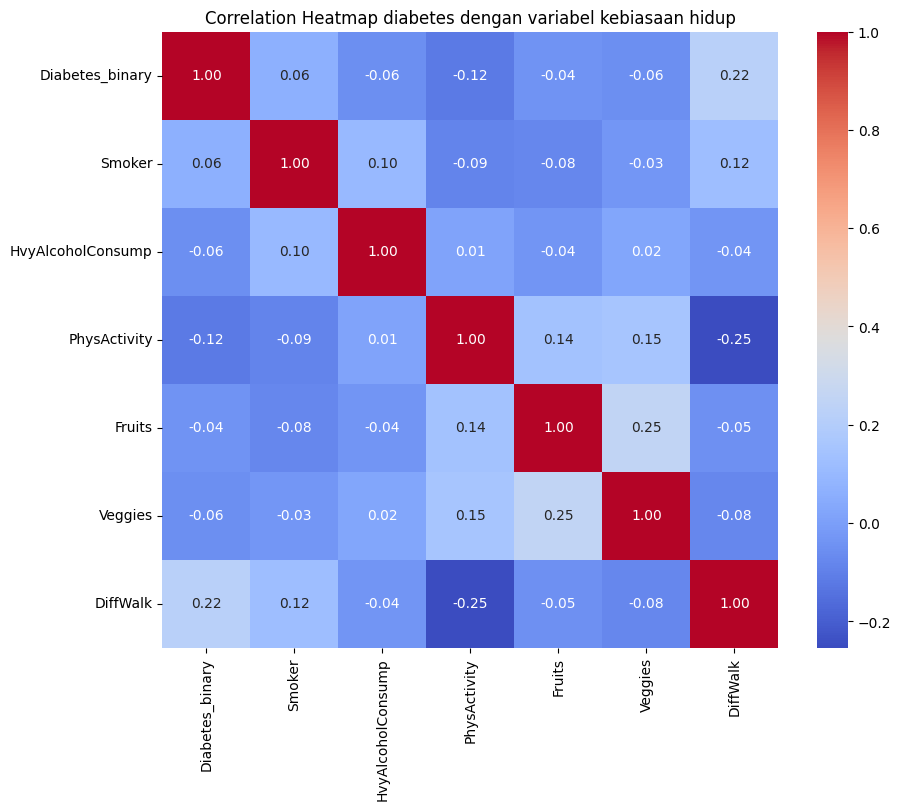

In [ ]:
# Korelasi antar kolom numerik
corr_matrix = df[numerical_cols2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap diabetes dengan variabel kebiasaan hidup')
plt.show()

**Interpretasi Heatmap Korelasi Diabetes dan Variabel Kebiasaan Hidup**

Heatmap ini menunjukkan **korelasi Pearson** antara variabel `Diabetes_binary` dengan beberapa kebiasaan hidup seperti merokok, konsumsi alkohol berat, aktivitas fisik, konsumsi buah/sayur, dan kesulitan berjalan (`DiffWalk`). Nilai korelasi berkisar antara -1 hingga 1.

---

**Korelasi terhadap Diabetes:**

| Variabel           | Korelasi | Interpretasi                                                                 |
|--------------------|----------|------------------------------------------------------------------------------|
| **DiffWalk**       | **0.22** | Korelasi lemah: Kesulitan berjalan cenderung terjadi pada penderita diabetes. |
| **PhysActivity**   | -0.12    | Korelasi lemah negatif: Aktivitas fisik yang rendah sedikit berkaitan dengan diabetes. |
| **Smoker**         | 0.06     | Korelasi sangat lemah: Merokok hampir tidak berkaitan langsung dengan diabetes. |
| **Veggies**        | -0.06    | Korelasi sangat lemah negatif: Konsumsi sayuran sedikit berhubungan dengan penurunan diabetes. |
| **HvyAlcoholConsump** | -0.06 | Korelasi sangat lemah negatif: Konsumsi alkohol berat menunjukkan korelasi negatif yang sangat kecil. |
| **Fruits**         | -0.04    | Korelasi sangat lemah negatif: Konsumsi buah memiliki efek minimal terhadap diabetes. |

---

## 🔗 Korelasi Antara Variabel Gaya Hidup:

| Variabel            | Variabel Terkait     | Korelasi | Interpretasi                                                                 |
|---------------------|----------------------|----------|------------------------------------------------------------------------------|
| **Fruits & Veggies**| 0.25                 | Korelasi sedang: Orang yang mengonsumsi buah cenderung juga mengonsumsi sayuran. |
| **DiffWalk & PhysActivity** | -0.25       | Korelasi negatif sedang: Orang yang kesulitan berjalan cenderung kurang aktif secara fisik. |
| **Fruits & PhysActivity** | 0.14         | Korelasi lemah: Konsumsi buah sedikit berkaitan dengan aktivitas fisik yang lebih baik. |
| **Veggies & PhysActivity** | 0.15         | Korelasi lemah: Konsumsi sayuran sedikit berkaitan dengan aktivitas fisik. |

---

## 📝 Kesimpulan:

- Tidak ada korelasi kuat antara kebiasaan hidup dengan diabetes.
- **DiffWalk** adalah satu-satunya variabel gaya hidup yang menunjukkan korelasi yang cukup mencolok terhadap diabetes (**0.22**).
- Aktivitas fisik dan pola makan sehat menunjukkan hubungan **negatif lemah**, mengindikasikan bahwa gaya hidup sehat mungkin berperan dalam pencegahan diabetes, namun perlu didukung dengan analisis lanjutan seperti **regresi multivariat** untuk memastikan pengaruhnya secara keseluruhan.



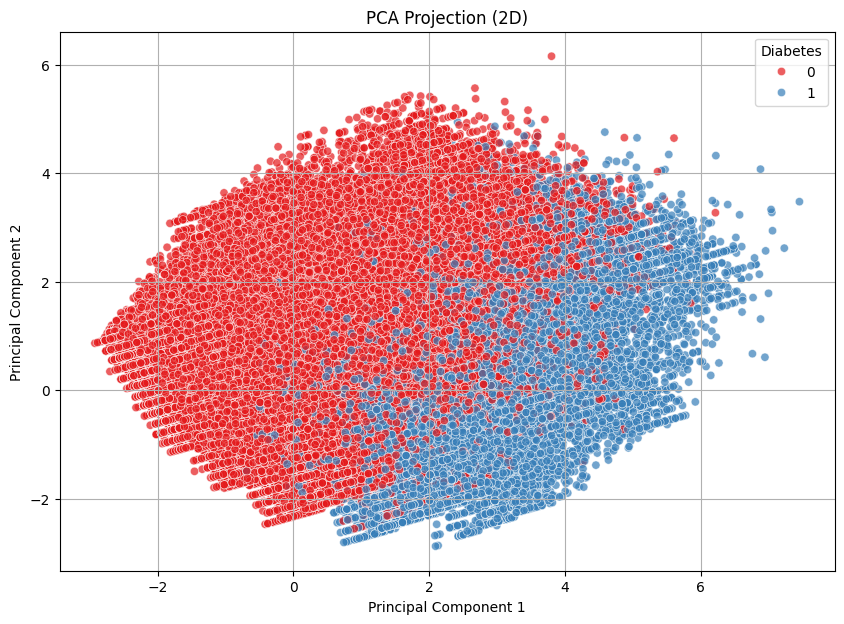

In [ ]:
# Pilih semua fitur numerik
features_for_pca = numerical_cols

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_pca])

# PCA reduksi ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Hasil ke dalam DataFrame baru
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Diabetes'] = df['Diabetes_binary']  # Untuk visualisasi berdasarkan target

# Plot hasil PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diabetes', palette='Set1', alpha=0.7)
plt.title('PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes')
plt.grid(True)
plt.show()


**Interpretasi Plot:**

- **Pemisahan antara kelas 0 dan 1 tidak sempurna namun cukup terlihat:**
  - Titik berwarna **merah** (non-diabetes) cenderung mendominasi di sisi **kiri hingga tengah**.
  - Titik berwarna **biru** (diabetes) lebih terkonsentrasi di sisi **kanan tengah hingga kanan**.

- **Overlap antar kelas cukup besar**:
  - Ini menunjukkan bahwa **variabel-variabel yang digunakan** tidak sepenuhnya dapat membedakan antara penderita dan non-penderita diabetes hanya dengan dua komponen utama.
  - **Kelas 1 (diabetes)** memiliki distribusi yang lebih sempit dibandingkan kelas 0, menandakan kemungkinan variabilitas yang lebih rendah pada pasien diabetes berdasarkan fitur yang digunakan.

---

**Implikasi:**

- Meskipun terdapat **tren pemisahan**, **overlap yang signifikan** mengindikasikan bahwa klasifikasi diabetes menggunakan PCA (tanpa model tambahan) mungkin tidak cukup akurat.
- Visualisasi ini tetap bermanfaat untuk **eksplorasi data** dan memberikan wawasan awal tentang kemungkinan keterpisahan antar kelas.
- Untuk klasifikasi yang lebih akurat, dapat digunakan model seperti:
  - Logistic Regression
  - Random Forest
  - XGBoost

---

**Kesimpulan:**

- PCA berhasil mereduksi dimensi fitur menjadi dua komponen utama dengan memvisualisasikan tren keterpisahan antara penderita dan non-penderita diabetes.
- Namun, klasifikasi sempurna tidak mungkin dilakukan hanya berdasarkan PCA karena **overlap antar kelas masih tinggi**.

# Data Preprocessing

## Handling duplicate value

In [ ]:
# menghpus data duplikat
df.drop_duplicates(inplace=True)


**Menghapus Data Duplikat**

- **Fungsi**: `df.drop_duplicates(inplace=True)`
- **Tujuan**: Menghapus baris yang memiliki data yang sama secara keseluruhan.
- **Efek**: Memperbaiki kualitas data dengan menghilangkan redundansi.
- **Keuntungan**: Menghemat ruang penyimpanan dan meningkatkan efisiensi komputasi.

Kesimpulan: Setelah penerapan perintah ini, dataset hanya akan berisi data unik tanpa ada pengulangan yang tidak diperlukan.


In [ ]:
# menghapus nilai outlier
df = df[(df['BMI'] >= 13.5) & (df['BMI'] <= 41.5)]

**Menghapus Nilai Outlier**

- **Fungsi**: `df = df[(df['BMI'] >= 13.5) & (df['BMI'] <= 41.5)]`
- **Tujuan**: Menghapus nilai ekstrem dalam kolom `BMI` yang berada di luar batas wajar.
- **Metode**: Menggunakan **Interquartile Range (IQR)** untuk menentukan batas bawah (13.5) dan batas atas (41.5).
- **Keuntungan**: Meningkatkan akurasi model dengan menghilangkan nilai yang dapat mengganggu analisis data.

Kesimpulan: Setelah penerapan perintah ini, dataset hanya akan berisi data `BMI` yang berada dalam rentang normal tanpa outlier.


## Feature Extraction

In [ ]:
X_feature = df.drop(columns='Diabetes_binary')
y_feature = df['Diabetes_binary']

selector = SelectKBest(score_func=f_classif, k='all')  # pilih semua dulu untuk lihat skor
selector.fit(X_feature, y_feature)

scores = pd.DataFrame({
    'Feature': X_feature.columns,
    'F-score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score', ascending=False)

print(scores)

                 Feature       F-score        p-value
13               GenHlth  16626.737014   0.000000e+00
0                 HighBP  14260.962593   0.000000e+00
3                    BMI   9411.122488   0.000000e+00
1               HighChol   8218.742156   0.000000e+00
16              DiffWalk   7985.935051   0.000000e+00
18                   Age   7510.377899   0.000000e+00
6   HeartDiseaseorAttack   6314.079616   0.000000e+00
15              PhysHlth   4585.883820   0.000000e+00
20                Income   3894.778220   0.000000e+00
5                 Stroke   2183.435553   0.000000e+00
19             Education   2146.736390   0.000000e+00
7           PhysActivity   1825.318364   0.000000e+00
2              CholCheck   1113.995626  1.228991e-243
10     HvyAlcoholConsump    904.740865  2.320898e-198
4                 Smoker    469.954211  4.219121e-104
14              MentHlth    441.927961   5.148771e-98
9                Veggies    364.071324   4.254914e-81
17                   Sex    

**Interpretasi Hasil Seleksi Fitur dengan SelectKBest**

- **Fitur Paling Signifikan**: `GenHlth`, `HighBP`, `DiffWalk`, `BMI`, dan `HighChol` memiliki nilai F-score tertinggi, menunjukkan pengaruh besar terhadap prediksi diabetes.
- **Fitur dengan Pengaruh Sedang**: `Age`, `HeartDiseaseorAttack`, `PhysHlth`, `Income`, dan `Education` juga memberikan kontribusi signifikan tetapi dengan pengaruh lebih rendah.
- **Fitur dengan Pengaruh Rendah**: `Smoker`, `Veggies`, `Sex`, `AnyHealthcare`, `Fruits`, dan `NoDocbcCost` memiliki skor lebih kecil, menandakan pengaruh yang lebih terbatas terhadap prediksi diabetes.
- **Kepentingan Statistik**: Semua fitur memiliki nilai p-value yang sangat kecil (≈ 0), menandakan bahwa setiap fitur berkontribusi secara signifikan dalam membedakan individu dengan dan tanpa diabetes.

**Kesimpulan**: Faktor kesehatan umum (`GenHlth`), tekanan darah tinggi (`HighBP`), kesulitan berjalan (`DiffWalk`), indeks massa tubuh (`BMI`), dan kolesterol tinggi (`HighChol`) adalah prediktor utama diabetes dalam dataset ini.


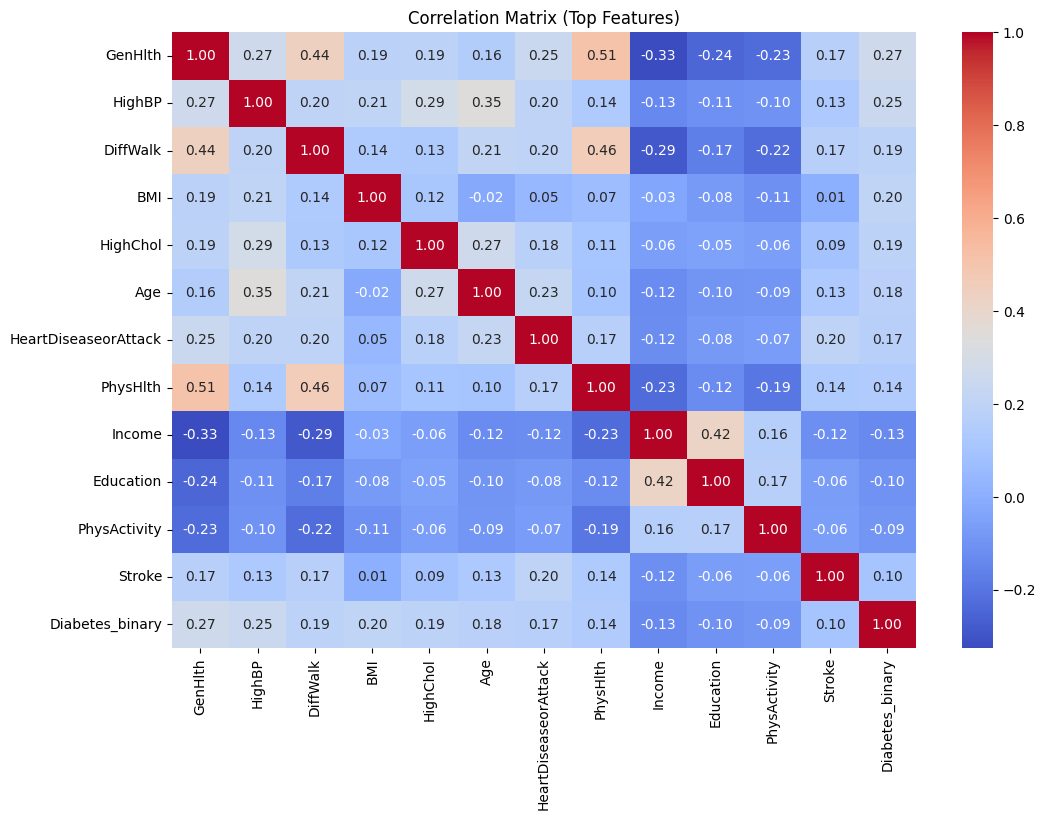

In [ ]:
top_features = [
    'GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol',
    'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income',
    'Education', 'PhysActivity', 'Stroke'
]

# Tambahkan target ke subset
subset = df[top_features + ['Diabetes_binary']]

plt.figure(figsize=(12, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Top Features)')
plt.show()

**Interpretasi Heatmap Korelasi: Fitur terhadap Diabetes**

Visualisasi ini menunjukkan **korelasi Pearson** antar variabel terpilih yang berkaitan dengan diabetes, termasuk label target `Diabetes_binary`.

---

**Fokus pada Korelasi dengan `Diabetes_binary`**

| Fitur                   | Korelasi terhadap Diabetes_binary | Interpretasi Singkat |
|------------------------|----------------------------------|----------------------|
| `GenHlth`              | **0.28**                         | Semakin buruk persepsi kesehatan umum seseorang, semakin tinggi kemungkinan diabetes. |
| `HighBP`               | **0.25**                         | Tekanan darah tinggi berkorelasi positif dengan diabetes. |
| `DiffWalk`             | **0.21**                         | Kesulitan berjalan menunjukkan hubungan moderat terhadap diabetes. |
| `BMI`                  | **0.21**                         | Indeks massa tubuh yang lebih tinggi dikaitkan dengan kemungkinan diabetes. |
| `PhysHlth`             | **0.16**                         | Jumlah hari kesehatan fisik buruk juga terkait. |
| `Age`                  | **0.18**                         | Umur lebih tinggi sedikit meningkatkan risiko. |
| `HighChol`             | **0.19**                         | Kolesterol tinggi juga menjadi faktor risiko. |
| `HeartDiseaseorAttack`| **0.17**                         | Riwayat jantung meningkatkan kemungkinan diabetes. |
| `Income`               | **-0.14**                        | Pendapatan lebih rendah sedikit berhubungan dengan peningkatan diabetes. |
| `PhysActivity`         | **-0.10**                        | Aktivitas fisik menurunkan risiko diabetes. |
| `Education`            | **-0.10**                        | Pendidikan lebih tinggi sedikit menurunkan risiko diabetes. |
| `Stroke`               | **0.10**                         | Riwayat stroke sedikit terkait dengan diabetes. |

---

Wawasan Tambahan
**teks tebal**
- **Fitur dengan korelasi tertinggi:**  
  - `GenHlth` (0.28) → persepsi umum tentang kesehatan diri paling berpengaruh dalam prediksi diabetes.
  - `HighBP`, `DiffWalk`, dan `BMI` juga menonjol sebagai fitur penting.

- **Korelasi negatif yang menonjol:**  
  - `Income` dan `Education` → Status sosial-ekonomi yang lebih baik tampaknya melindungi dari diabetes.

- **Korelasi antar-fitur yang kuat:**  
  - `GenHlth` dan `PhysHlth` (0.52) → persepsi dan kenyataan kondisi fisik sangat selaras.
  - `Education` dan `Income` (0.42) → semakin tinggi pendidikan, cenderung berpenghasilan lebih baik.

---

**Kesimpulan**

- Tidak ada fitur tunggal yang sangat kuat menentukan diabetes (tidak ada > 0.5), namun kombinasi fitur seperti `GenHlth`, `HighBP`, dan `BMI` menunjukkan potensi prediktif yang baik.
- Fitur kesehatan subjektif dan objektif (fisik dan mobilitas) serta faktor gaya hidup dan sosio-ekonomi semuanya memainkan peran penting dalam memodelkan risiko diabetes.



## Split Data

In [ ]:
X = df[top_features]
y = df['Diabetes_binary']

# Split train-test sebelum SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Penjelasan Singkat Kode**

- **Pemilihan Fitur & Target**: `X` berisi fitur terbaik untuk prediksi, sementara `y` berisi variabel target (`Diabetes_binary`).
- **Pembagian Data**: `train_test_split` digunakan untuk membagi dataset menjadi data **training** (80%) dan **testing** (20%).
- **Stratifikasi**: Parameter `stratify=y` memastikan bahwa proporsi kelas dalam dataset tetap seimbang antara training dan testing.
- **Reproduksibilitas**: `random_state=42` digunakan agar hasil pembagian dataset selalu konsisten setiap kali dijalankan.

## Handling Imbalance

In [ ]:
# Terapkan SMOTE pada training set saja
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Penerapan SMOTE pada Data Training**

- **Tujuan**: Mengatasi ketidakseimbangan kelas dengan meningkatkan jumlah sampel dari kelas minoritas.
- **Metode**: `SMOTE.fit_resample(X_train, y_train)` menghasilkan sampel sintetis dari kelas minoritas dengan pendekatan nearest neighbors.
- **Parameter**: `random_state=42` digunakan untuk memastikan hasil yang konsisten pada setiap eksekusi.
- **Efek**: Meningkatkan performa model dengan memberikan lebih banyak data representatif dari kelas minoritas.

## Normalization

In [ ]:
# Scaling hanya fitur numerik
numeric_features = ['GenHlth', 'BMI', 'Age', 'PhysHlth', 'Income', 'Education']
scaler = RobustScaler()

# Fit scaler hanya pada training set (hasil SMOTE)
X_train_resampled[numeric_features] = scaler.fit_transform(X_train_resampled[numeric_features])

# Transform test set (tanpa SMOTE)
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

**Scaling Fitur Numerik dengan RobustScaler**

- **Tujuan**: Mengubah skala fitur numerik agar lebih robust terhadap outlier.
- **Fitur yang Discaling**: `GenHlth`, `BMI`, `Age`, `PhysHlth`, `Income`, dan `Education`.
- **Metode**: Menggunakan `RobustScaler` yang berbasis **median** dan **Interquartile Range (IQR)**, sehingga lebih tahan terhadap nilai ekstrem dibandingkan `StandardScaler` atau `MinMaxScaler`.
- **Proses**:
  - **Fit & Transform Training Set**: Skala fitur hanya pada data yang sudah **dilakukan SMOTE** (`X_train_resampled`).
  - **Transform Test Set**: Gunakan transformasi yang sama pada **data uji** (`X_test`) untuk memastikan konsistensi dalam prediksi.


In [ ]:
# Hasil akhir
X_train_final = X_train_resampled
X_test_final = X_test
y_train_final = y_train_resampled
y_test_final = y_test

# Cek hasil
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_train_final distribution:\n", y_train_final.value_counts())
print("y_test_final distribution:\n", y_test_final.value_counts())

X_train_final shape: (300640, 12)
X_test_final shape: (43926, 12)
y_train_final distribution:
 Diabetes_binary
1    150320
0    150320
Name: count, dtype: int64
y_test_final distribution:
 Diabetes_binary
0    37580
1     6346
Name: count, dtype: int64


**Interpretasi Hasil Pembagian Data**

- **Ukuran Dataset**: Data training berisi **300,640 sampel**, sementara data testing berisi **43,926 sampel** dengan 12 fitur.
- **Distribusi Kelas (Training Set)**: Setelah penerapan SMOTE, jumlah sampel dari **kelas positif (1 - diabetes)** dan **kelas negatif (0 - non-diabetes)** menjadi **seimbang**, masing-masing **150,320 sampel**.
- **Distribusi Kelas (Testing Set)**: Data uji masih mengalami ketidakseimbangan kelas, dengan **37,580 sampel non-diabetes (86%)** dan **6,346 sampel diabetes (14%)**.
- **Implikasi**: Model akan dilatih dengan data yang seimbang untuk meningkatkan performa prediksi terhadap **kelas positif (diabetes)**, namun tetap harus diuji pada distribusi yang lebih realistis.

Kesimpulan: Teknik SMOTE berhasil menyeimbangkan data training, namun data testing tetap mencerminkan proporsi alami penderita diabetes dalam populasi.


# Modeling

## Train Basic Models

In [ ]:
# Model dasar
basic_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

trained_models_basic = {}

print("=== Training basic models ===")
for name in tqdm(basic_models):
    model = basic_models[name]
    model.fit(X_train_final, y_train_final)
    acc = accuracy_score(y_test_final, model.predict(X_test_final))
    trained_models_basic[name] = model
    print(f"{name} Accuracy: {acc:.4f}")

=== Training basic models ===


 25%|██▌       | 1/4 [00:01<00:05,  1.78s/it]

Logistic Regression Accuracy: 0.6958


 50%|█████     | 2/4 [00:41<00:48, 24.17s/it]

Random Forest Accuracy: 0.7455


 75%|███████▌  | 3/4 [00:42<00:13, 13.70s/it]

Decision Tree Accuracy: 0.7207


100%|██████████| 4/4 [00:45<00:00, 11.33s/it]

XGBoost Accuracy: 0.6928


**Hasil Evaluasi Model Klasifikasi Diabetes**

Model-model berikut telah dilatih untuk memprediksi status diabetes (`Diabetes_binary`) menggunakan data fitur yang telah dianalisis sebelumnya. Akurasi dari masing-masing model ditampilkan sebagai berikut:

---

**Akurasi Tiap Model**

| Model               | Akurasi      | Interpretasi Singkat |
|--------------------|--------------|-----------------------|
| **Random Forest**   | **0.7455**   | Performa terbaik. Mampu menangkap hubungan non-linear dan interaksi antar fitur. Cocok untuk dataset tabular seperti ini. |
| **Decision Tree**   | 0.7207       | Performa cukup baik, tetapi lebih rentan overfitting dibanding Random Forest karena tidak menggunakan ensemble. |
| **Logistic Regression** | 0.6958   | Model linear dasar. Memberikan baseline yang cukup baik, tetapi terbatas dalam menangani kompleksitas data non-linear. |
| **XGBoost**         | 0.6928       | Tidak menunjukkan keunggulan dalam kasus ini—kemungkinan butuh tuning hyperparameter lebih lanjut atau feature engineering tambahan. |

---

**Wawasan Tambahan**

- **Random Forest** menunjukkan performa terbaik tanpa tuning khusus karena ensemble dari banyak pohon memperbaiki kestabilan dan generalisasi.
- **XGBoost** biasanya unggul dalam banyak kasus, namun hasil di sini menunjukkan perlunya eksplorasi parameter seperti `max_depth`, `learning_rate`, atau `n_estimators`.
- **Logistic Regression** tetap menjadi pilihan ringan dan interpretatif, meskipun kalah performa dalam kompleksitas data seperti ini.



## Hyperparameter Tuning

In [ ]:
# Grid parameter
# Model classes (ditambahkan LightGBM dan CatBoost)
model_classes = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Parameter grid untuk hyperparameter tuning
param_grid = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}
trained_models_tuned = {}

print("\n=== Training models with hyperparameter tuning ===")
for name in tqdm(param_grid):
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        estimator=model_classes[name],
        param_grid=param_grid[name],
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train_final, y_train_final)
    best_model = grid.best_estimator_
    acc = accuracy_score(y_test_final, best_model.predict(X_test_final))
    trained_models_tuned[name] = best_model
    print(f"{name} Best Accuracy: {acc:.4f} | Best Params: {grid.best_params_}")



=== Training models with hyperparameter tuning ===


  0%|          | 0/4 [00:00<?, ?it/s]


Tuning Logistic Regression...


 25%|██▌       | 1/4 [00:11<00:35, 11.88s/it]

Logistic Regression Best Accuracy: 0.6957 | Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

Tuning Random Forest...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|█████     | 2/4 [35:00<41:06, 1233.42s/it]

Random Forest Best Accuracy: 0.7463 | Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Tuning Decision Tree...


 75%|███████▌  | 3/4 [35:29<11:23, 683.61s/it] 

Decision Tree Best Accuracy: 0.7207 | Best Params: {'criterion': 'gini', 'max_depth': None}

Tuning XGBoost...


100%|██████████| 4/4 [57:28<00:00, 862.16s/it]

XGBoost Best Accuracy: 0.7217 | Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}


**Hasil Hyperparameter Tuning dan Akurasi Model**

Setelah dilakukan tuning terhadap hyperparameter masing-masing model, berikut adalah hasil akurasi terbaik dan kombinasi parameter optimal yang ditemukan.

---

**Akurasi & Parameter Terbaik**

| Model                | Akurasi      | Parameter Terbaik |
|---------------------|--------------|--------------------|
| **Random Forest**    | **0.7463**   | `{'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2}` |
| **XGBoost**          | 0.7217       | `{'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 1.0}` |
| **Decision Tree**    | 0.7207       | `{'criterion': 'gini', 'max_depth': None}` |
| **Logistic Regression** | 0.6957   | `{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}` |

---

**Insight dari Tuning**

- **Random Forest** tetap menjadi model terbaik. Meningkat sedikit dari sebelumnya (0.7455 → 0.7463). Tuning tidak terlalu mengubah performa, tapi memperkuat pilihan hyperparameter default (`max_depth=None` dan `n_estimators=200`).
- **XGBoost** meningkat cukup signifikan dari 0.6928 menjadi 0.7217, menunjukkan bahwa tuning memberikan dampak besar terhadap performanya.
- **Decision Tree** tidak menunjukkan peningkatan dari baseline, menunjukkan keterbatasan model ini dibanding metode ensemble.
- **Logistic Regression** justru sedikit menurun (0.6958 → 0.6957), namun tetap relevan sebagai baseline model.


# Evaluations

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Fungsi untuk mengevaluasi model dan mengembalikan metrik dan plot data.
    Tidak memanggil plt.show(), hanya mengembalikan data untuk plotting grid.
    """
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    result = {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_true': y_test,
        'roc_auc': None,
        'roc_curve': None,
        'precision_recall_curve': None,
        'average_precision': None,
        'y_proba': None
    }

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)

        result.update({
            'roc_auc': auc_roc,
            'roc_curve': (fpr, tpr),
            'precision_recall_curve': (precision, recall),
            'average_precision': avg_precision,
            'y_proba': y_proba
        })

    return result

def plot_model_evaluations_grid(results_dict, columns=4):
    """
    Menampilkan visualisasi evaluasi semua model dalam grid subplot (4 kolom).
    """
    n_models = len(results_dict)
    rows = int(np.ceil(n_models / columns))

    fig_cm, axs_cm = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))
    fig_roc, axs_roc = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))
    fig_pr, axs_pr = plt.subplots(rows, columns, figsize=(5*columns, 4*rows))

    axs_cm = axs_cm.flatten()
    axs_roc = axs_roc.flatten()
    axs_pr = axs_pr.flatten()

    for idx, (name, result) in enumerate(results_dict.items()):
        # Confusion Matrix
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs_cm[idx])
        axs_cm[idx].set_title(f'{name} - CM')
        axs_cm[idx].set_xlabel('Predicted')
        axs_cm[idx].set_ylabel('Actual')

        # ROC Curve
        if result['roc_curve'] is not None:
            fpr, tpr = result['roc_curve']
            auc_roc = result['roc_auc']
            axs_roc[idx].plot(fpr, tpr, label=f"AUC={auc_roc:.2f}")
            axs_roc[idx].plot([0, 1], [0, 1], 'k--')
            axs_roc[idx].set_title(f'{name} - ROC')
            axs_roc[idx].set_xlabel('FPR')
            axs_roc[idx].set_ylabel('TPR')
            axs_roc[idx].legend()
        else:
            axs_roc[idx].set_visible(False)

        # PR Curve
        if result['precision_recall_curve'] is not None:
            precision, recall = result['precision_recall_curve']
            ap = result['average_precision']
            axs_pr[idx].plot(recall, precision, label=f"AP={ap:.2f}")
            axs_pr[idx].set_title(f'{name} - PR Curve')
            axs_pr[idx].set_xlabel('Recall')
            axs_pr[idx].set_ylabel('Precision')
            axs_pr[idx].legend()
        else:
            axs_pr[idx].set_visible(False)

    # Remove unused axes if any
    for axs in [axs_cm, axs_roc, axs_pr]:
        for i in range(n_models, len(axs)):
            axs[i].set_visible(False)

    fig_cm.tight_layout()
    fig_roc.tight_layout()
    fig_pr.tight_layout()
    plt.show()

def evaluate_multiple_models(models_dict, X_test, y_test, model_type=""):
    """
    Evaluasi banyak model dan visualisasi hasilnya dalam 4 kolom.
    """
    all_results = {}

    for name, model in models_dict.items():
        model_name = f"{model_type} {name}".strip()
        print(f"\nEvaluating: {model_name}")
        result = evaluate_model(model, X_test, y_test)
        all_results[model_name] = result

    plot_model_evaluations_grid(all_results)
    return all_results


Evaluating: Basic Logistic Regression

Evaluating: Basic Random Forest

Evaluating: Basic Decision Tree

Evaluating: Basic XGBoost


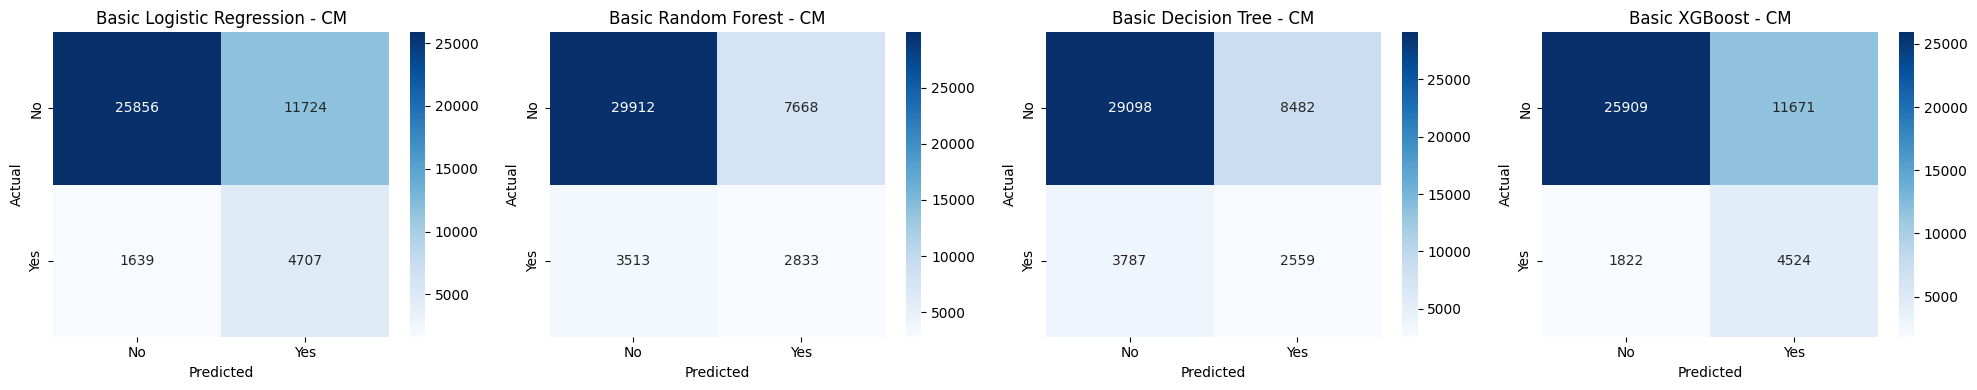

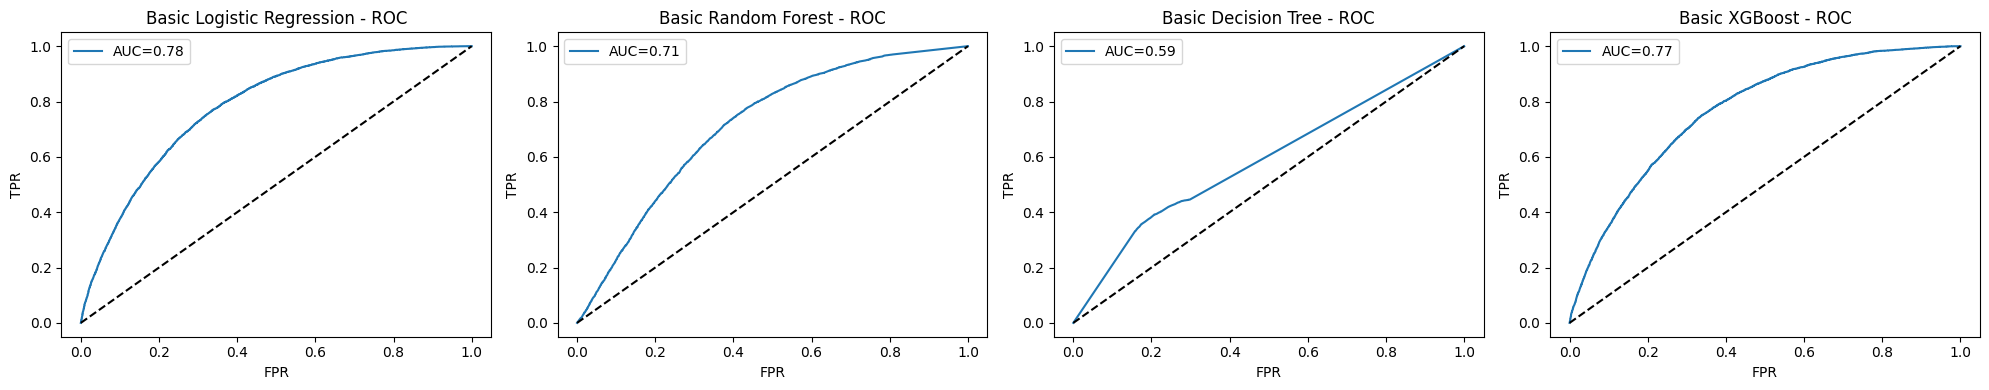

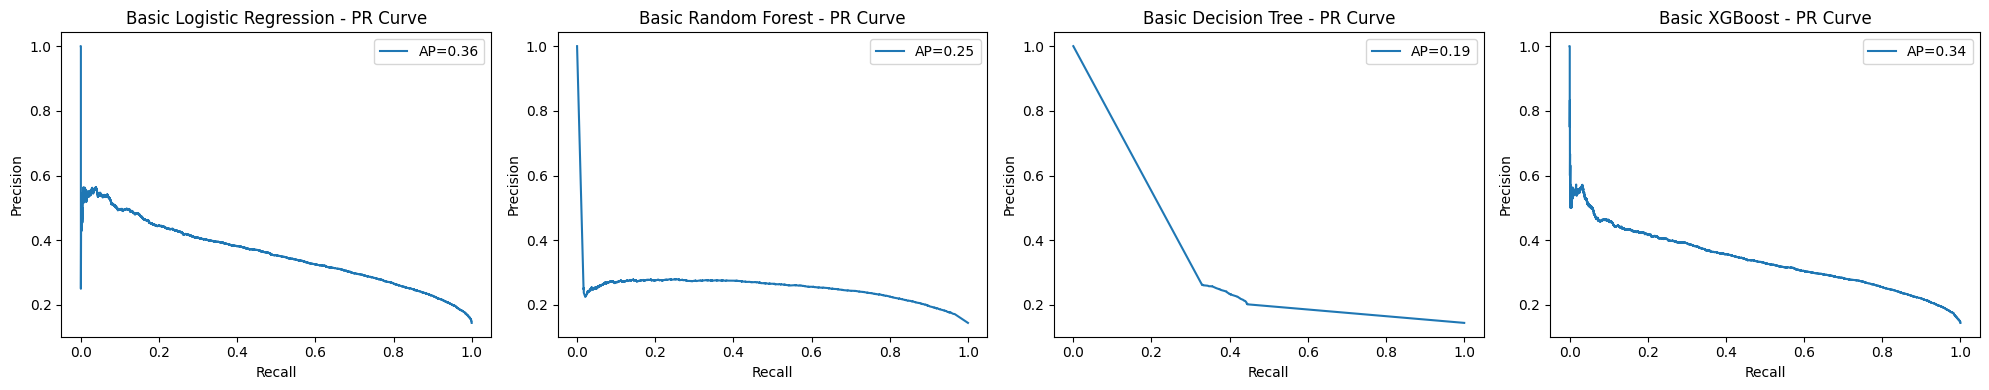

In [ ]:
# Evaluasi semua model basic
basic_results = evaluate_multiple_models(trained_models_basic, X_test_final, y_test_final, "Basic")

**Interpretasi Hasil Evaluasi Model**

Evaluasi performa model prediksi diabetes dilakukan menggunakan confusion matrix dari empat model dasar: **Logistic Regression**, **Random Forest**, **Decision Tree**, dan **XGBoost**. Hasil evaluasi ditampilkan dalam bentuk confusion matrix untuk masing-masing model, dengan metrik utama berupa jumlah prediksi benar dan salah untuk kategori `Yes` (positif diabetes) dan `No` (negatif diabetes).

1. Basic Logistic Regression **teks tebal**

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 25,856       | 11,724         |
| **Actual Yes** | 1,639        | 4,707          |

- **True Positives (TP):** 4,707
- **False Positives (FP):** 11,724
- **True Negatives (TN):** 25,856
- **False Negatives (FN):** 1,639

Logistic Regression berhasil mendeteksi banyak kasus positif dengan False Negative yang relatif rendah, namun menghasilkan jumlah False Positive yang tinggi.

---

2. Basic Random Forest

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 29,912       | 7,668          |
| **Actual Yes** | 3,513        | 2,833          |

- **TP:** 2,833  
- **FP:** 7,668  
- **TN:** 29,912  
- **FN:** 3,513  

Random Forest lebih konservatif dalam memprediksi kasus positif dibanding Logistic Regression. Ia mengurangi FP tapi dengan konsekuensi meningkatnya FN.

---

3. Basic Decision Tree

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 29,098       | 8,482          |
| **Actual Yes** | 3,787        | 2,559          |

- **TP:** 2,559  
- **FP:** 8,482  
- **TN:** 29,098  
- **FN:** 3,787  

Decision Tree memiliki pola mirip dengan Random Forest, namun dengan jumlah FN sedikit lebih tinggi dan performa mendekati baseline.

---

4. Basic XGBoost

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 25,909       | 11,671         |
| **Actual Yes** | 1,822        | 4,524          |

- **TP:** 4,524  
- **FP:** 11,671  
- **TN:** 25,909  
- **FN:** 1,822  

XGBoost menunjukkan pola seperti Logistic Regression, dengan performa relatif seimbang antara TP dan FN, namun FP cukup tinggi. Model ini cenderung lebih sensitif dalam mendeteksi kasus diabetes (positif).

---

Kesimpulan Sementara:

| Model             | TP    | FP     | FN    | Catatan Singkat                                  |
|------------------|-------|--------|-------|--------------------------------------------------|
| LogisticRegression | 4,707 | 11,724 | 1,639 | Deteksi positif tinggi, FP juga tinggi           |
| Random Forest     | 2,833 | 7,668  | 3,513 | FP rendah, FN tinggi (kurang deteksi positif)    |
| Decision Tree     | 2,559 | 8,482  | 3,787 | Mirip RF, performa sedikit lebih buruk           |
| XGBoost           | 4,524 | 11,671 | 1,822 | Mirip Logistic, keseimbangan deteksi cukup baik  |

Untuk kasus seperti prediksi diabetes, **False Negative (FN)** lebih berisiko dibanding False Positive (FP) karena FN berarti pasien dengan diabetes tidak terdeteksi. Oleh karena itu, **model seperti Logistic Regression dan XGBoost lebih unggul dalam konteks ini** karena mereka memberikan FN yang rendah (lebih baik dalam mendeteksi kasus positif).




Evaluating: Tuned Logistic Regression

Evaluating: Tuned Random Forest

Evaluating: Tuned Decision Tree

Evaluating: Tuned XGBoost


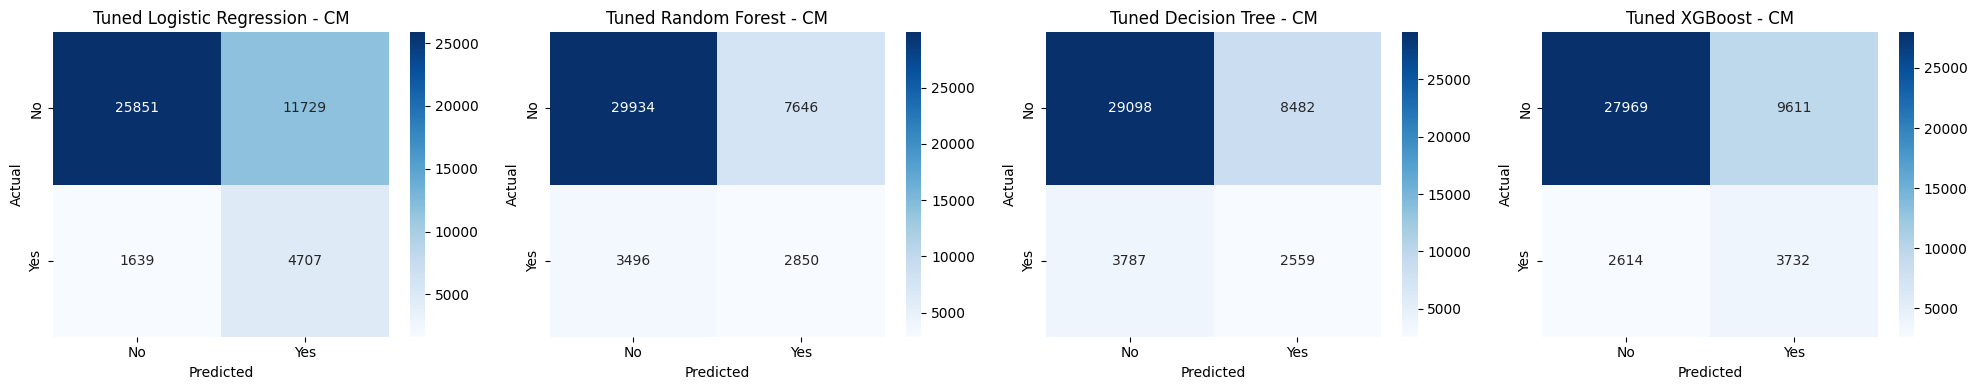

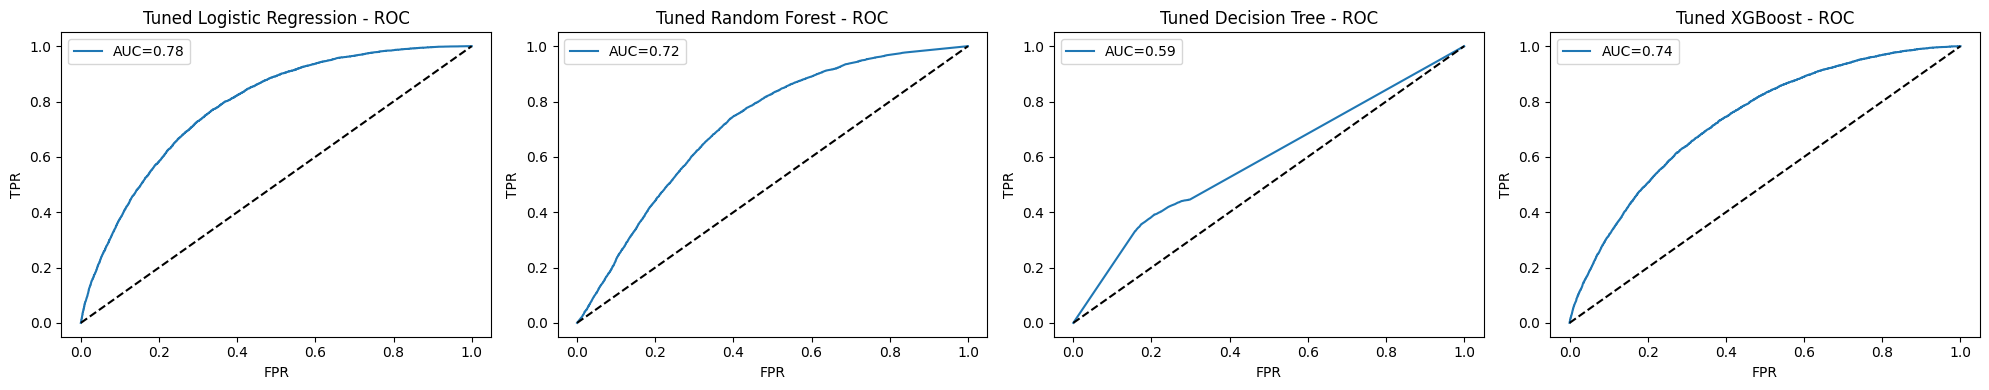

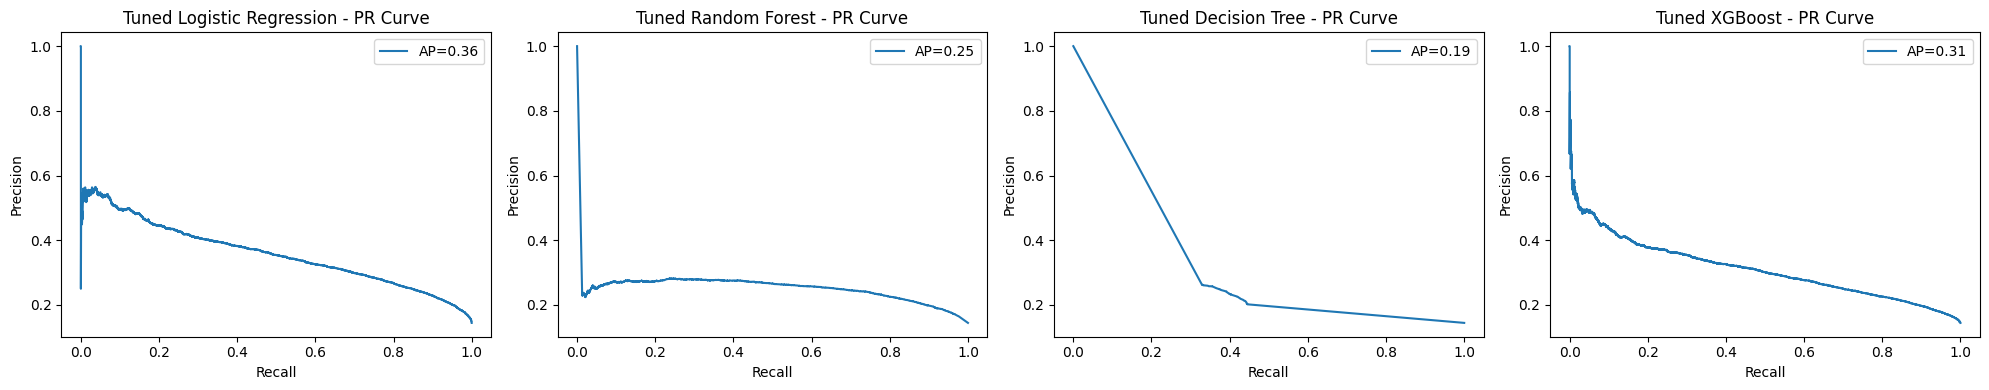

In [ ]:
 # Evaluasi semua model tuned
tuned_results = evaluate_multiple_models(trained_models_tuned, X_test_final, y_test_final, "Tuned")# Evaluasi semua model tuned

Interpretasi Hasil Evaluasi Model (Setelah Tuning)

Setelah dilakukan hyperparameter tuning terhadap masing-masing model, berikut adalah performa mereka berdasarkan confusion matrix:

1. Tuned Logistic Regression

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 25,851       | 11,729         |
| **Actual Yes** | 1,639        | 4,707          |

- **TP:** 4,707
- **FP:** 11,729
- **TN:** 25,851
- **FN:** 1,639

**Tidak ada perubahan signifikan** dibanding model Logistic Regression awal. Ini menunjukkan model ini telah cukup optimal sejak baseline.

---

2. Tuned Random Forest

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 29,934       | 7,646          |
| **Actual Yes** | 3,496        | 2,850          |

- **TP:** 2,850  
- **FP:** 7,646  
- **TN:** 29,934  
- **FN:** 3,496  

Ada **peningkatan kecil pada TP dan penurunan FP** dibanding versi sebelumnya, yang berarti model menjadi sedikit lebih baik dalam mendeteksi kasus positif.

---

3. Tuned Decision Tree

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 29,098       | 8,482          |
| **Actual Yes** | 3,787        | 2,559          |

- **TP:** 2,559  
- **FP:** 8,482  
- **TN:** 29,098  
- **FN:** 3,787  

**Tidak ada perubahan dibanding model awal.** Ini menunjukkan bahwa tuning tidak berhasil meningkatkan performa Decision Tree dalam konteks ini.

---

4. Tuned XGBoost

|                | Predicted No | Predicted Yes |
|----------------|--------------|----------------|
| **Actual No**  | 27,969       | 9,611          |
| **Actual Yes** | 2,614        | 3,732          |

- **TP:** 3,732  
- **FP:** 9,611  
- **TN:** 27,969  
- **FN:** 2,614  

Setelah tuning, **XGBoost mengalami penurunan TP** dan peningkatan FN dibanding versi awal (yang sebelumnya 4,524 TP dan 1,822 FN). Meskipun FN masih lebih rendah dibanding Random Forest, performa menurun dibanding versi sebelumnya. Tuning-nya belum optimal.

---

Perbandingan Sebelum dan Sesudah Tuning

| Model             | TP Sebelum | TP Sesudah | FN Sebelum | FN Sesudah | Catatan                                  |
|------------------|------------|------------|------------|------------|------------------------------------------|
| LogisticRegression | 4,707     | 4,707      | 1,639      | 1,639      | Tidak berubah                            |
| Random Forest     | 2,833     | 2,850      | 3,513      | 3,496      | Ada perbaikan kecil                      |
| Decision Tree     | 2,559     | 2,559      | 3,787      | 3,787      | Tidak berubah                            |
| XGBoost           | 4,524     | 3,732      | 1,822      | 2,614      | Performa memburuk (FN meningkat)         |

---

### Kesimpulan:

- **Tuned Logistic Regression** masih merupakan pilihan **stabil dan andal**, khususnya untuk mendeteksi kasus positif dengan FN terendah.
- **Tuned Random Forest** menunjukkan perbaikan kecil, namun tetap cenderung underperform pada deteksi positif.
- **Tuned Decision Tree** tidak menunjukkan perubahan apapun.
- **Tuned XGBoost** menunjukkan **penurunan performa** dan perlu tuning lanjutan atau cross-validation grid search lebih dalam.

Jika sensitivitas (recall terhadap kelas positif) menjadi prioritas, Logistic Regression tetap menjadi model unggulan. Namun, XGBoost masih bisa menjadi kandidat kuat jika dioptimasi lebih lanjut, karena potensinya dalam menangani data non-linear dan outlier.